# SAVANT Aerosol Lidar Visualization

In [69]:
import sys
import subprocess       # This won't work with anaconda, and do NOT recommend you to use conda
import glob # This is the system default package

import numpy as np
try:
    from matplotlib import pyplot as plt
except:
    print("The library matplotlib can't be loaded. Please wait for the installation and re-run program!")
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', 'matplotlib'])
    

from atmospheric_lidar import raymetrics

In [70]:
file_paths = sorted(glob.glob('D:/GitHub/SAVANT-Lidar-Paraview/Aerosol/2018-10-17-18/2018-10-18-0106/R*'))
print("%s files found." % len(file_paths))

255 files found.


## Split the files in separate PPI and RHI groups

In [71]:
# Get the scan info of the first file
f = raymetrics.ScanningFile(file_paths[0], get_name_by_order=True)
previous_azimuth = f.azimuth_angle
previous_zenith = f.zenith_angle

In [72]:
file_groups = []
current_group = []

for n, file_path in enumerate(file_paths):
    f = raymetrics.ScanningFile(file_path, get_name_by_order=True, import_now=False)  # Just read the header, for faster IO
     
    if (previous_azimuth == f.azimuth_angle) or (previous_zenith == f.zenith_angle):
        current_group.append(file_path)
    else:
        file_groups.append(current_group.copy())  # This group is finished
        previous_azimuth = f.azimuth_angle
        previous_zenith = f.zenith_angle
        current_group = []
        
file_groups.append(current_group)  # Apend also the last group 

print("Total number of groups %s." %  len(file_groups))    

Total number of groups 6.


In [73]:
# Load each measurement 
scans = []
for group_paths in file_groups:
    m = raymetrics.ScanningLidarMeasurement(group_paths, get_name_by_order=True)
    scans.append(m)

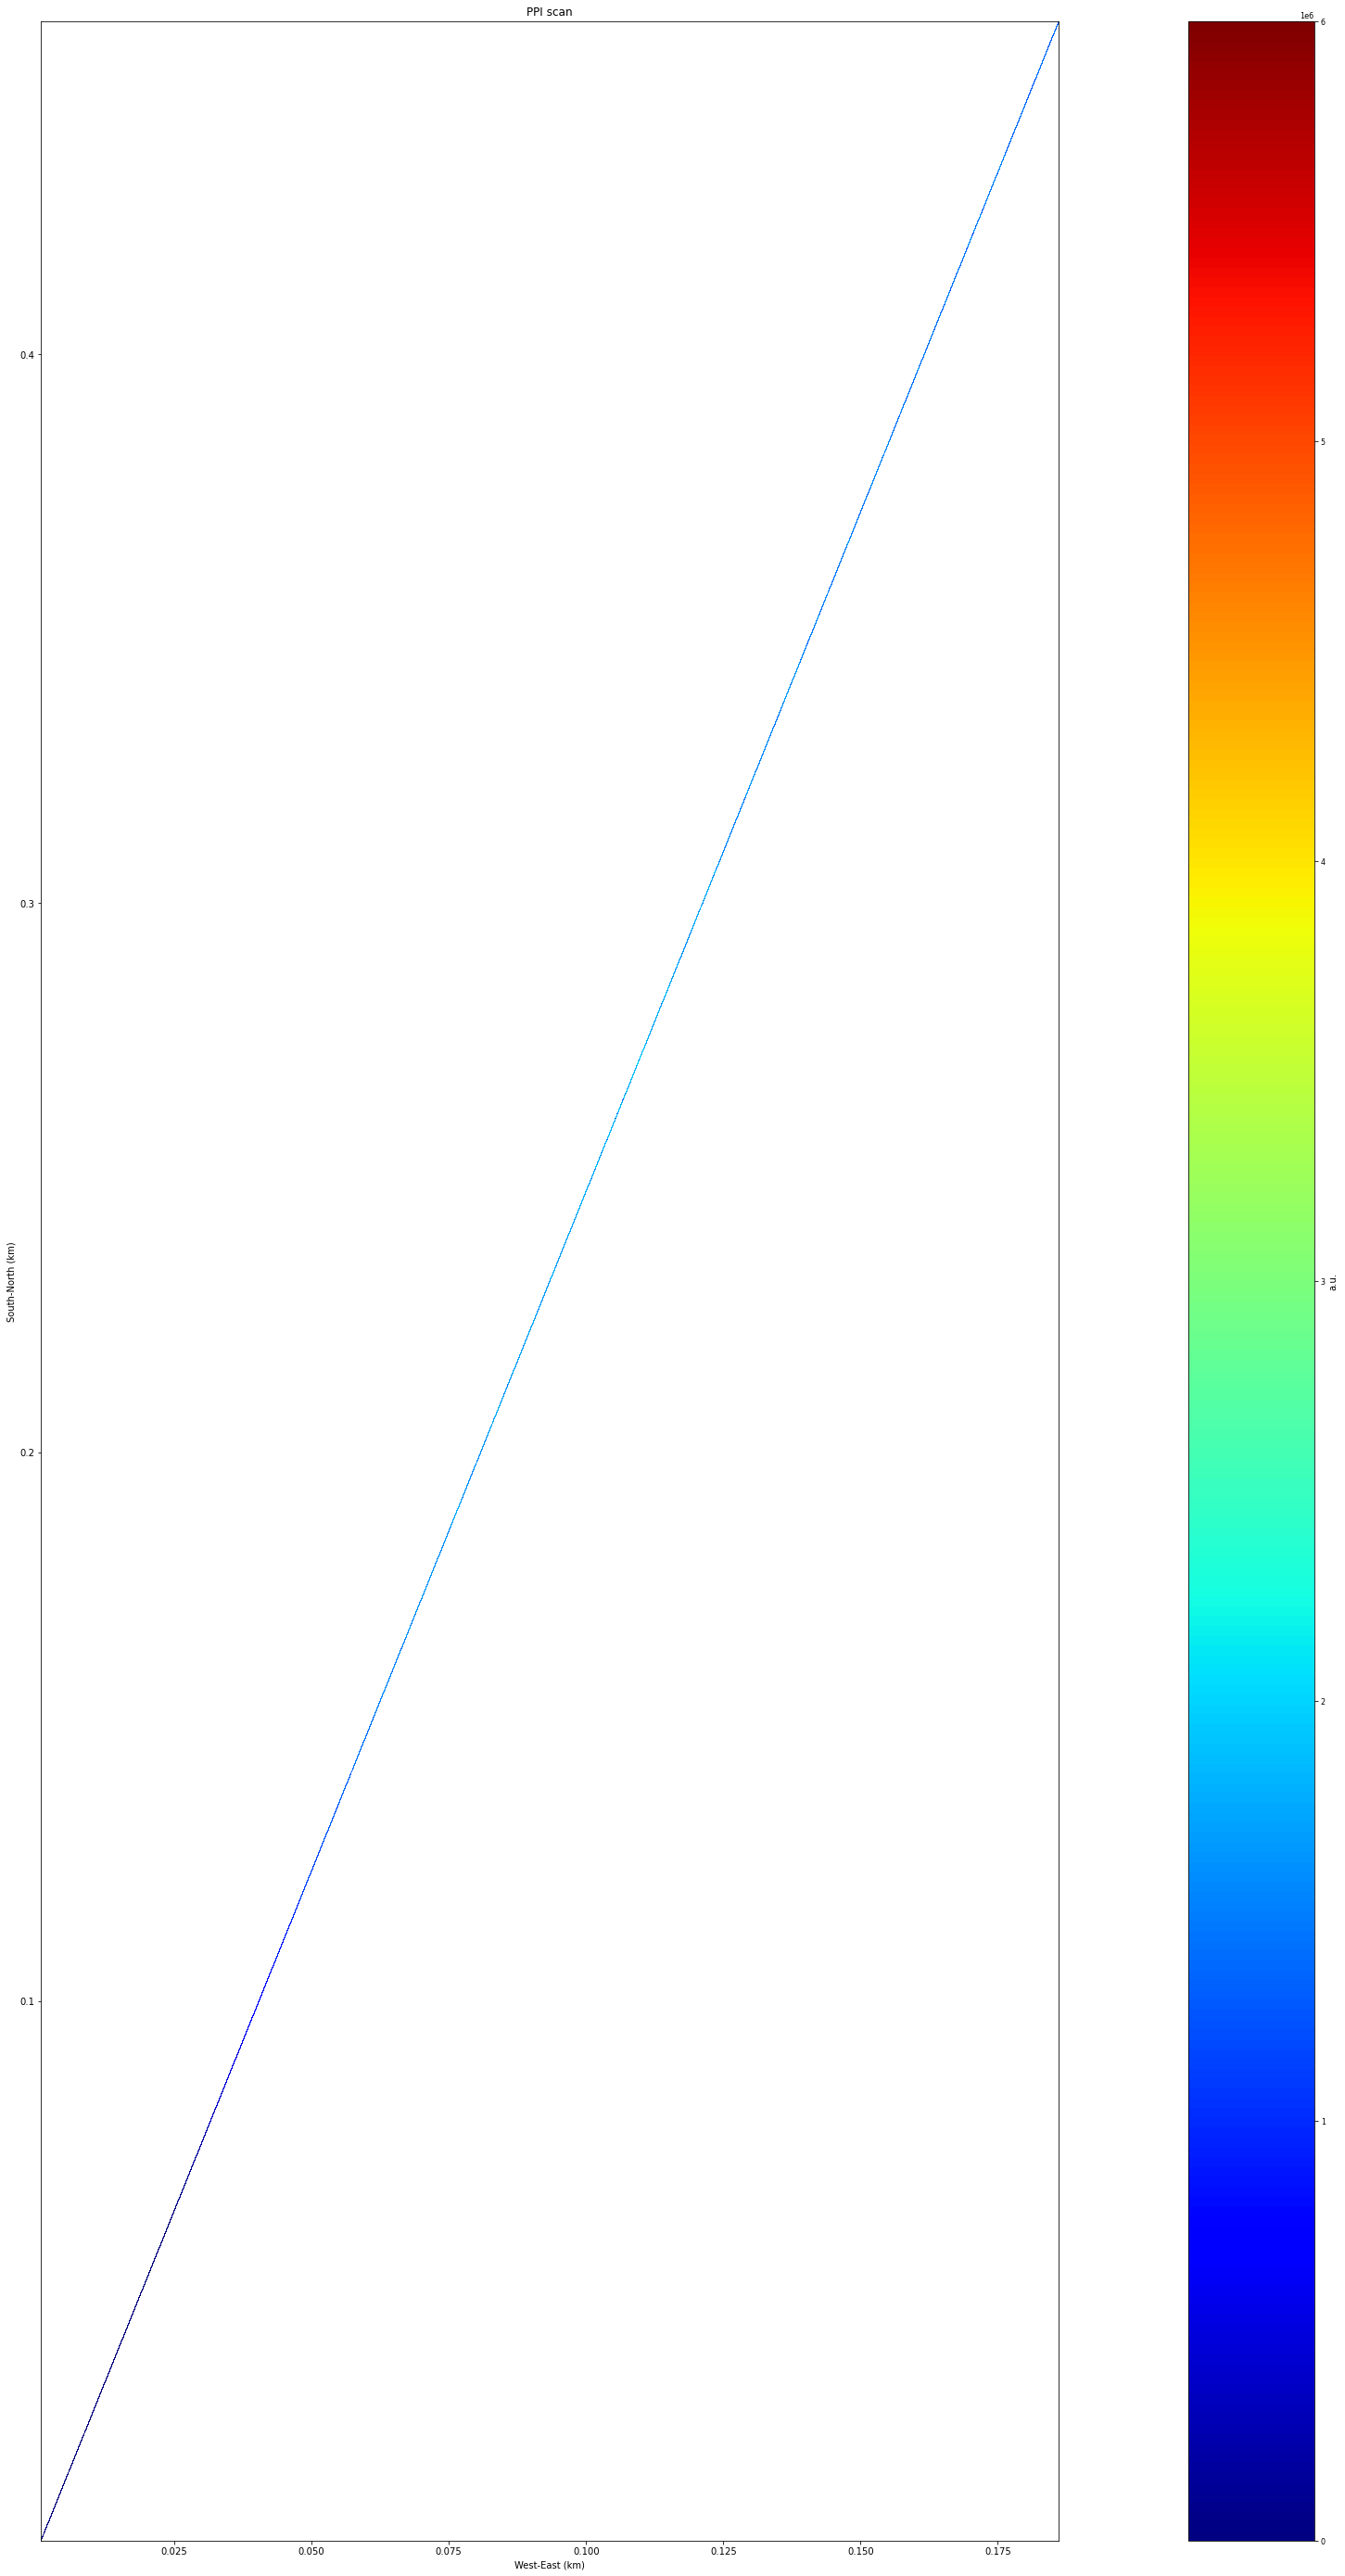

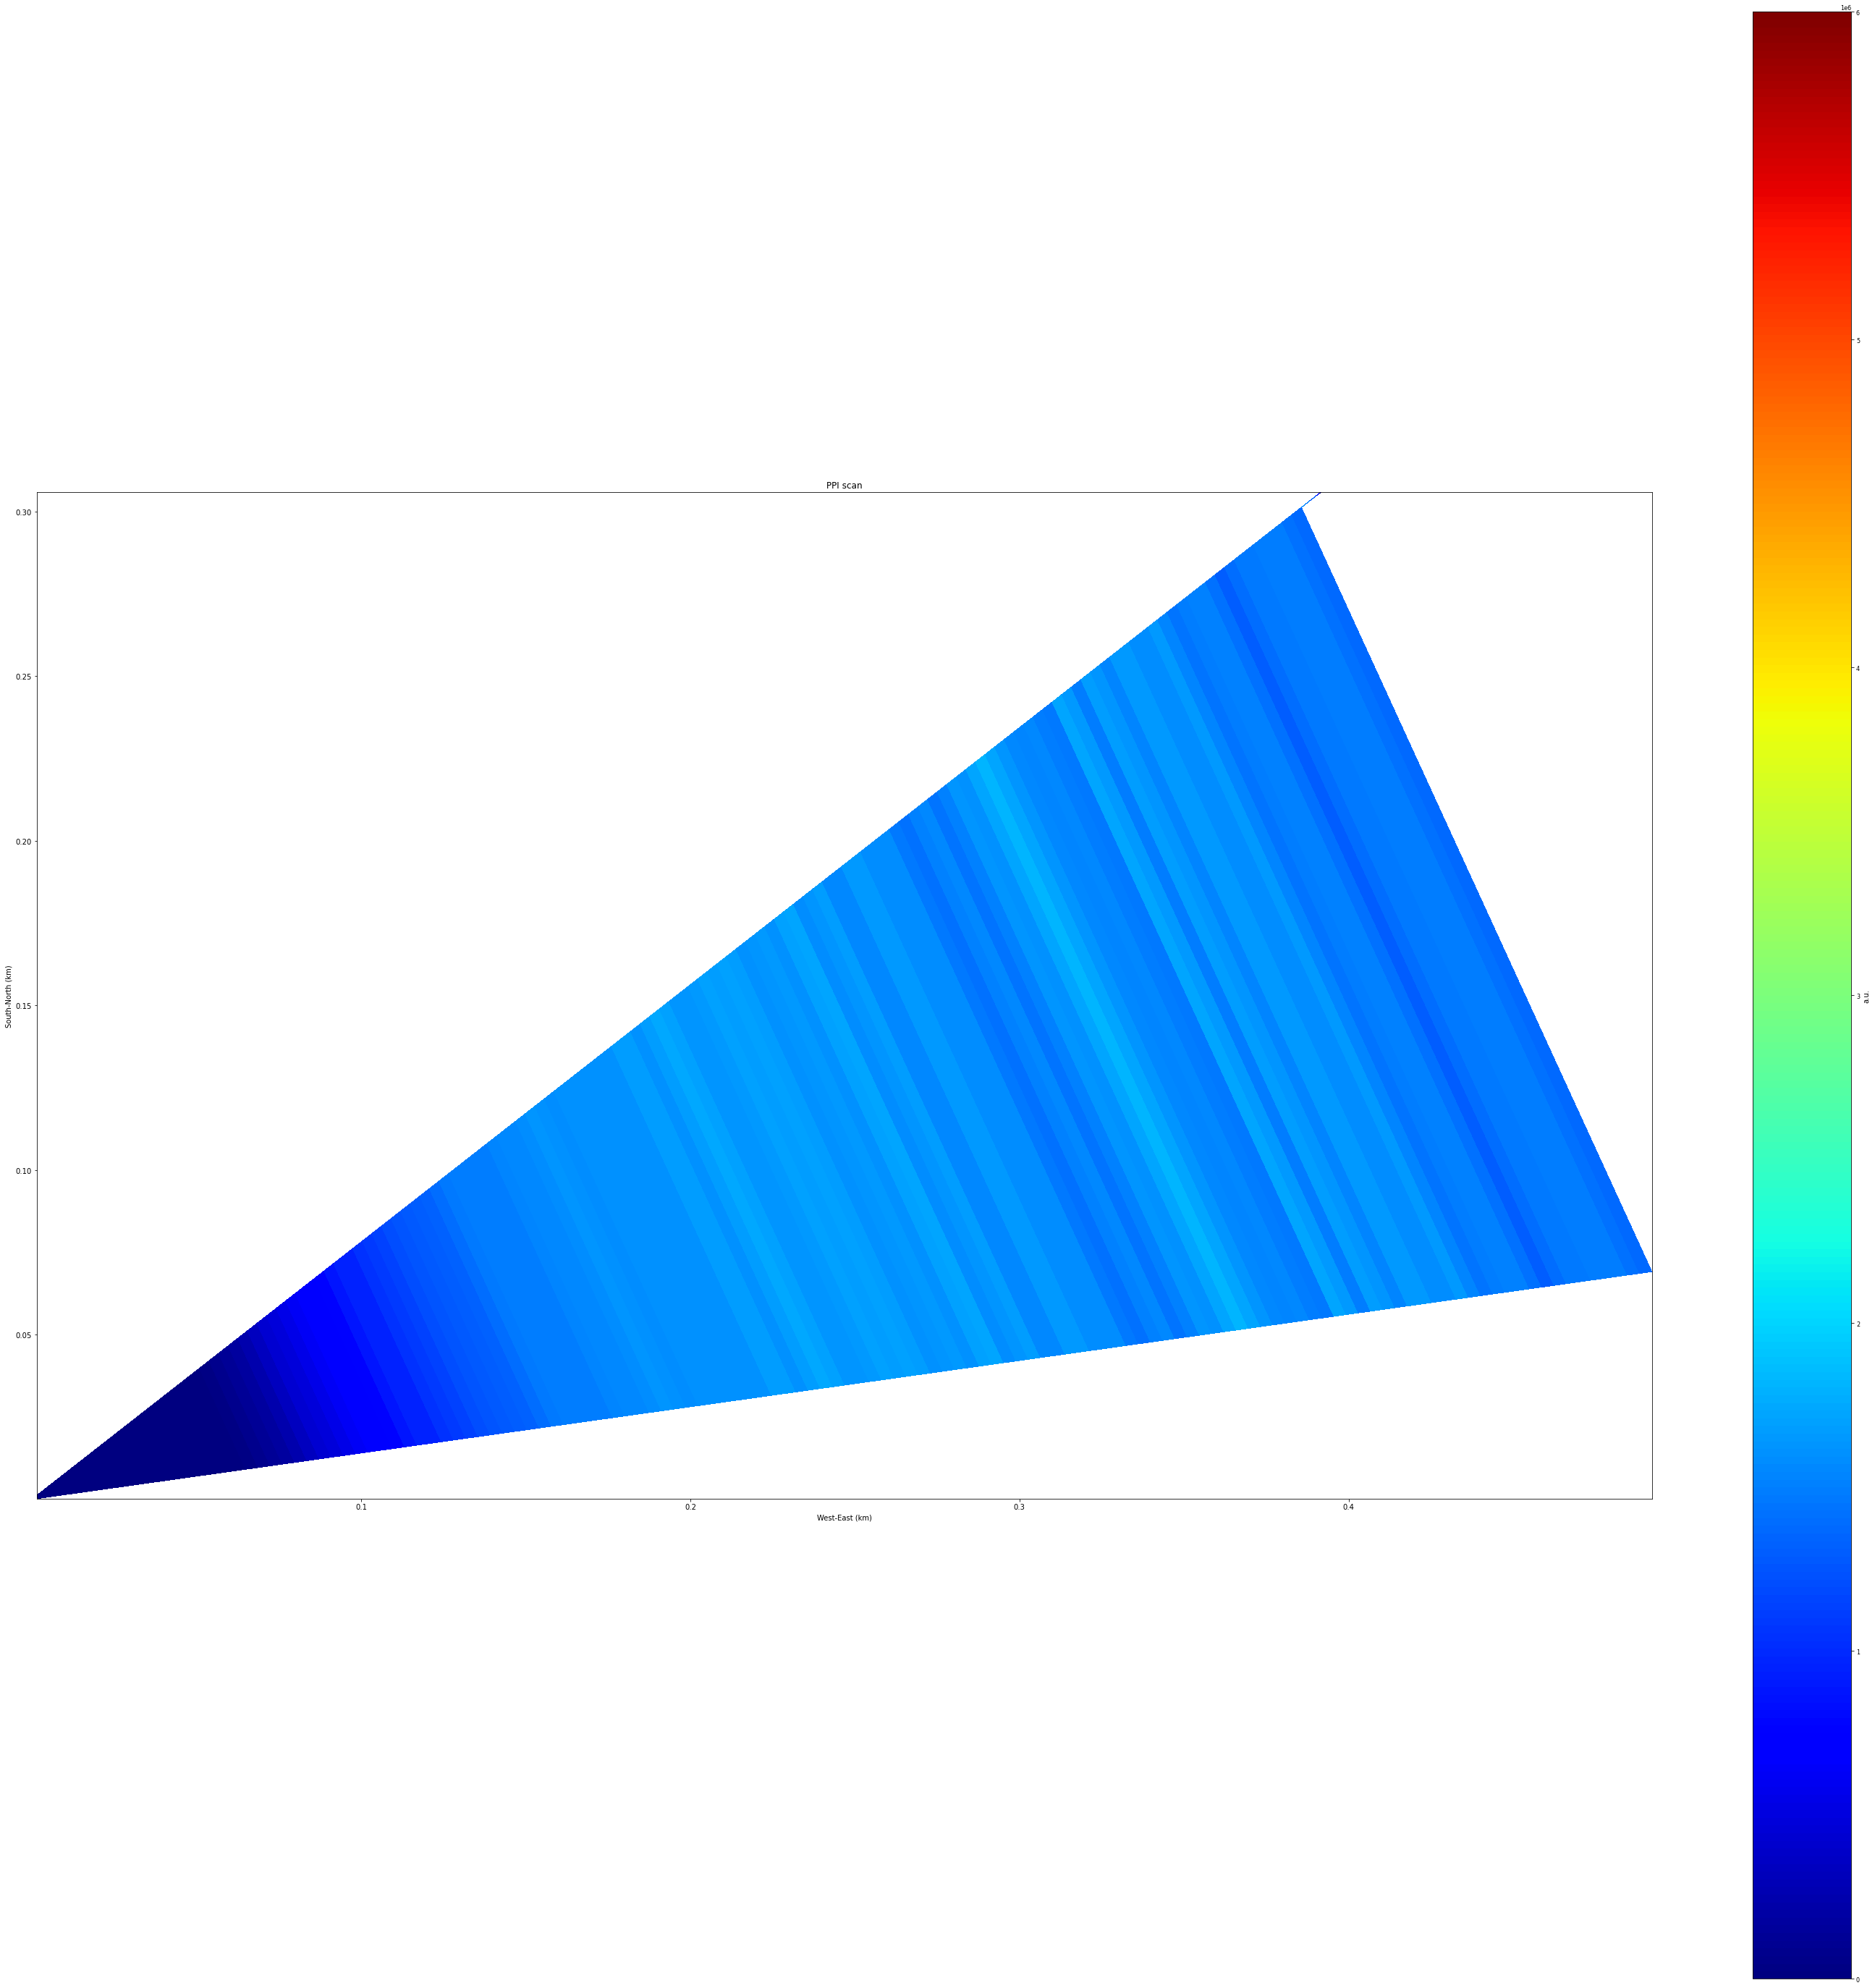

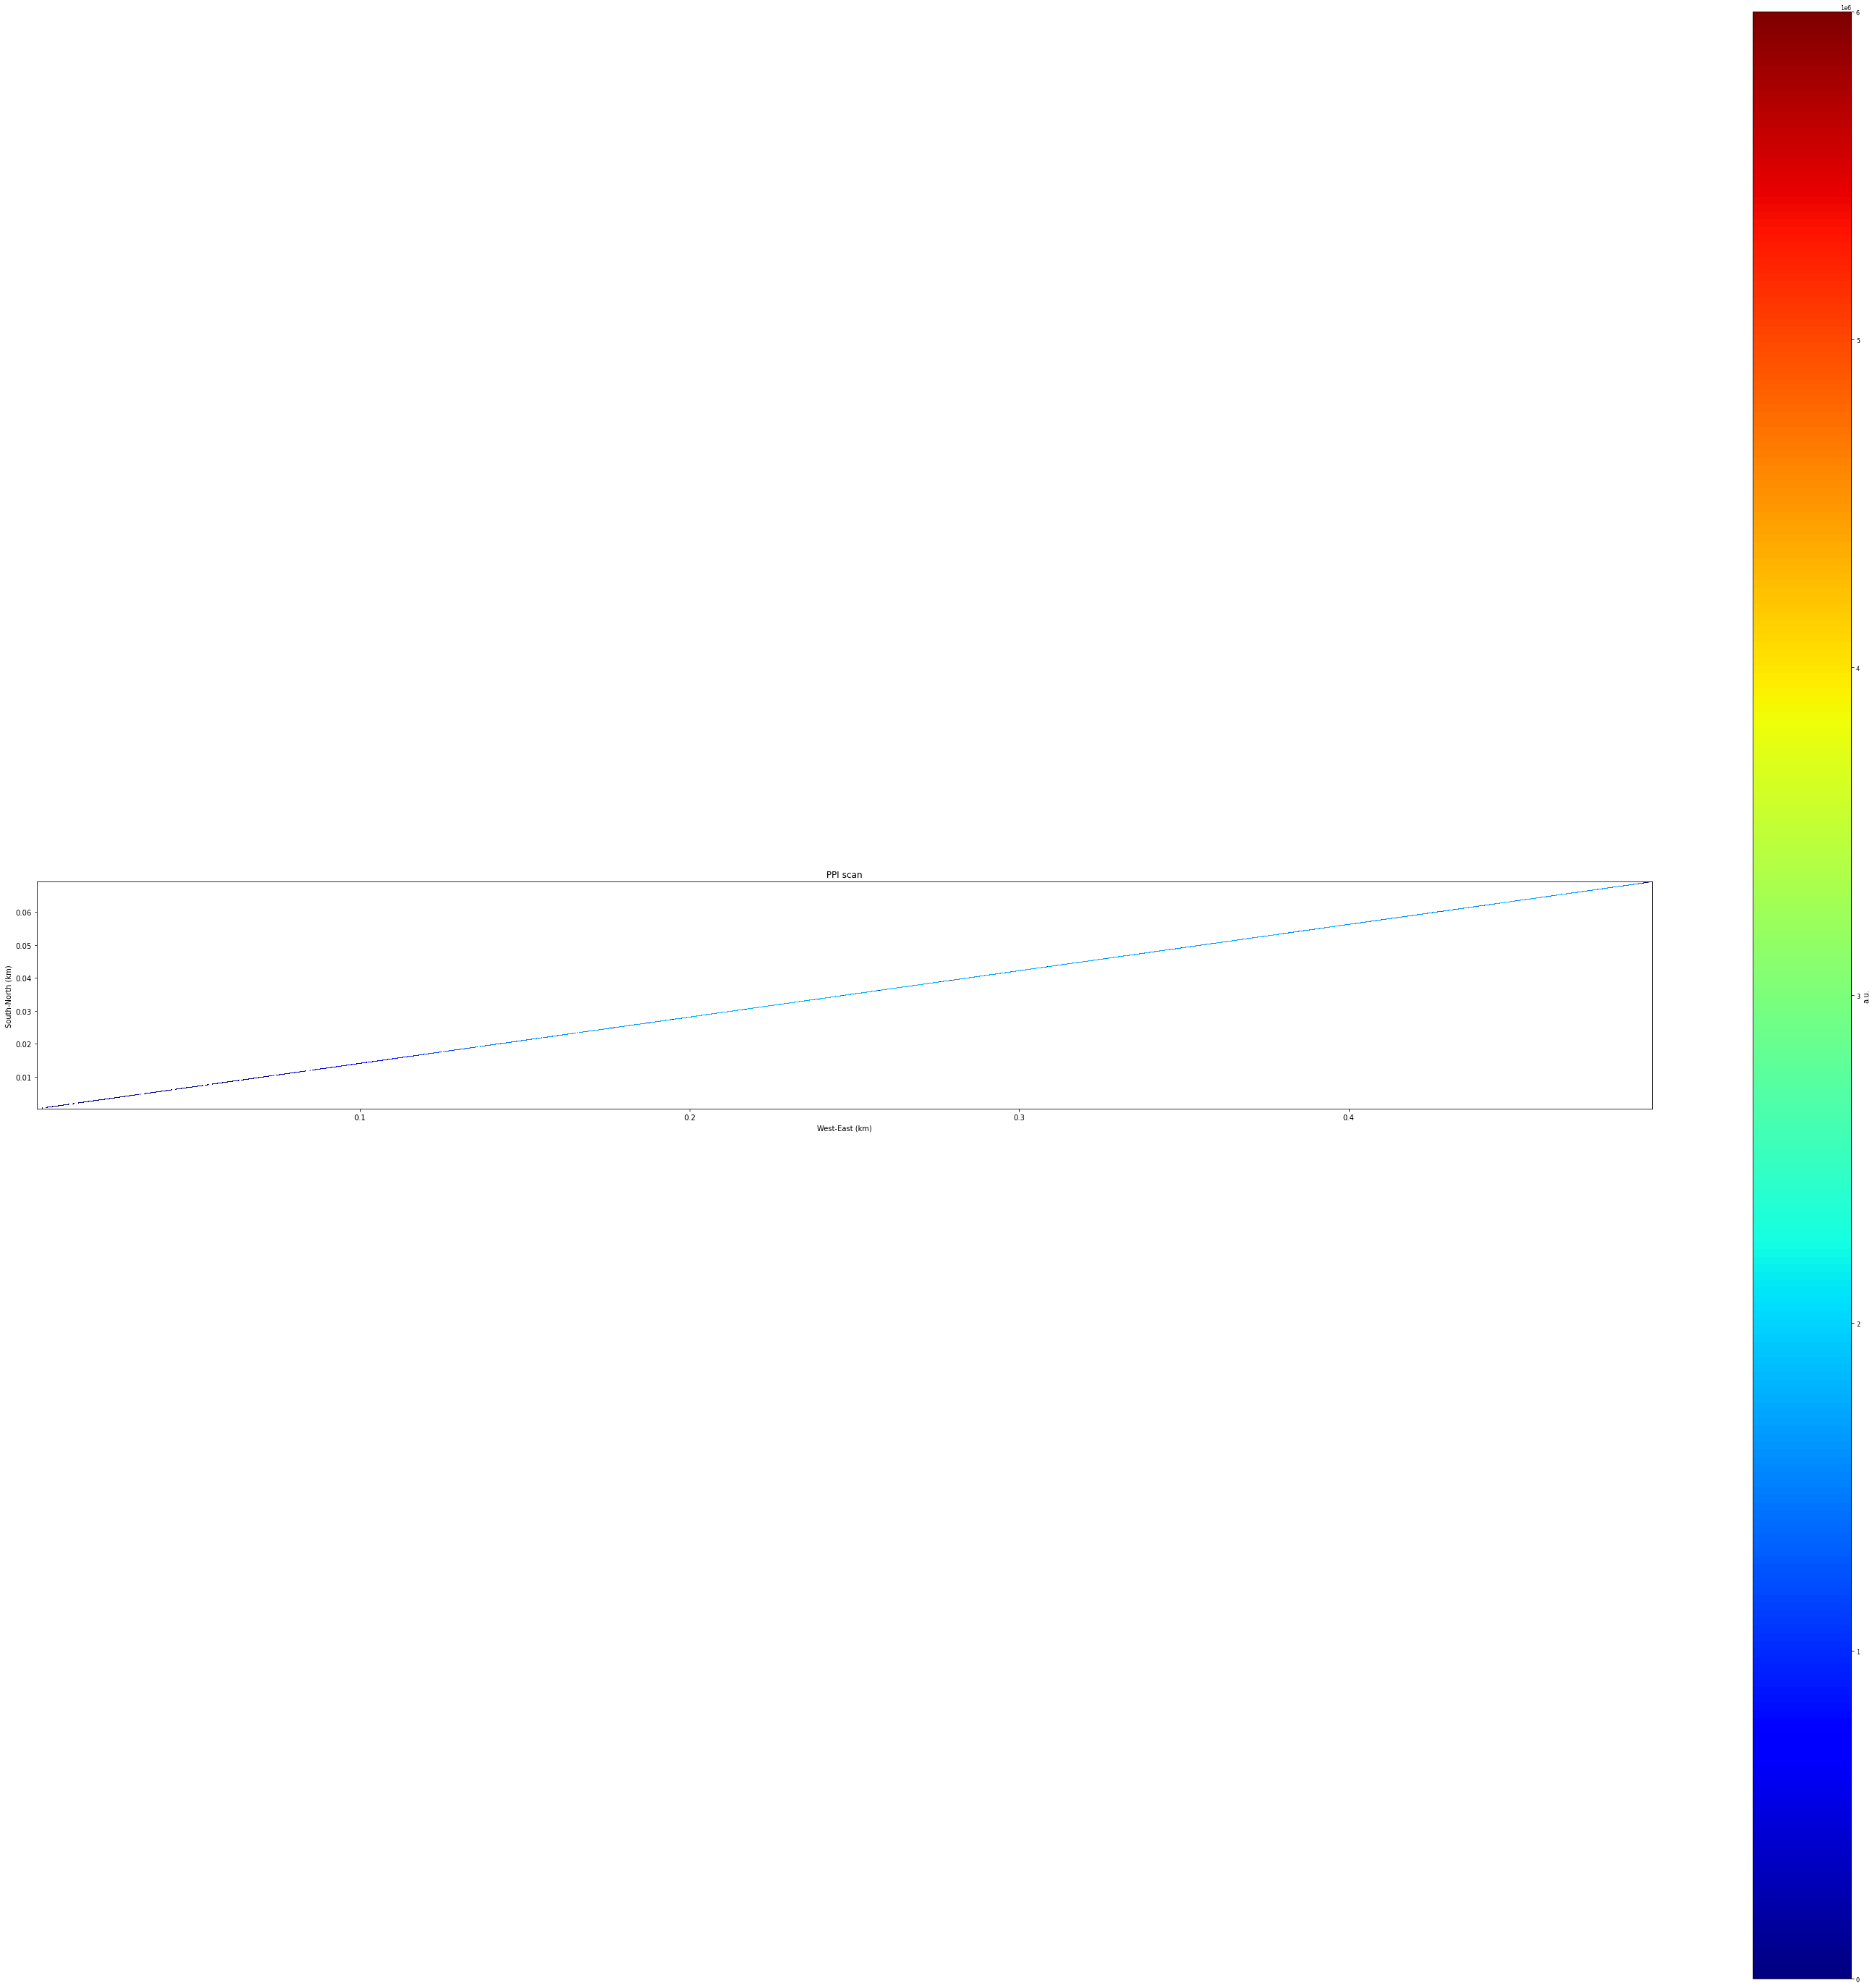

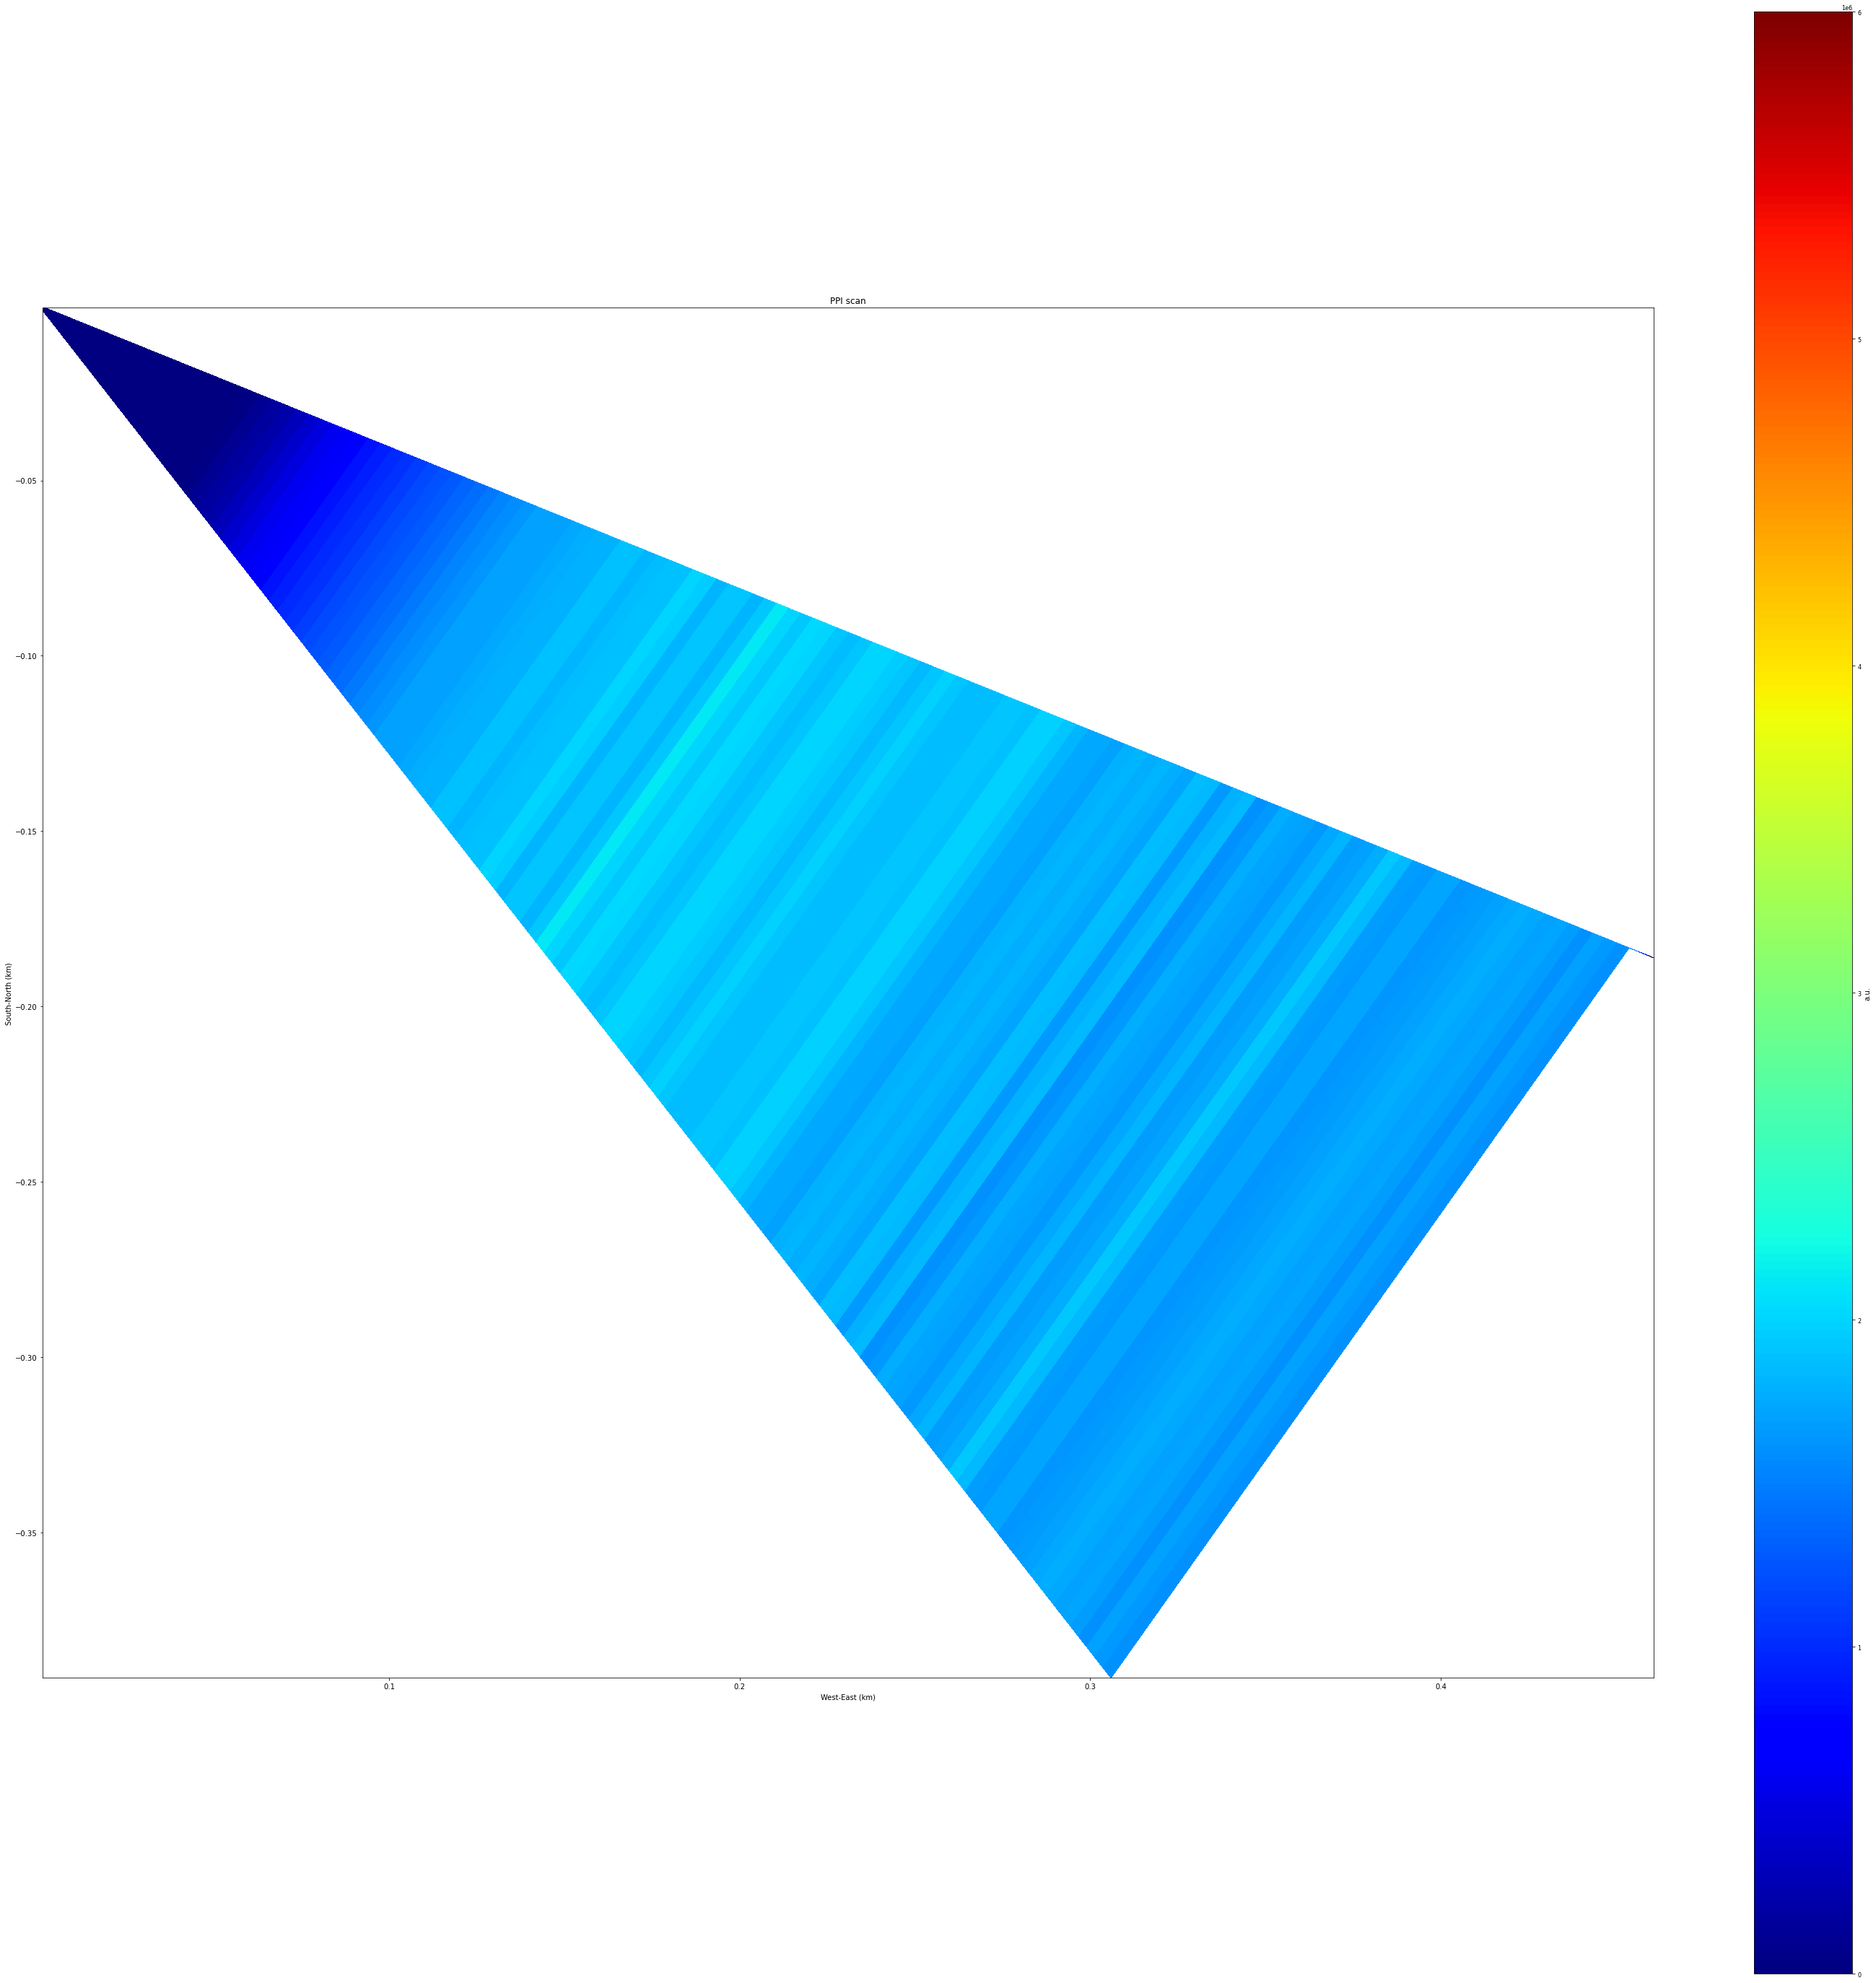

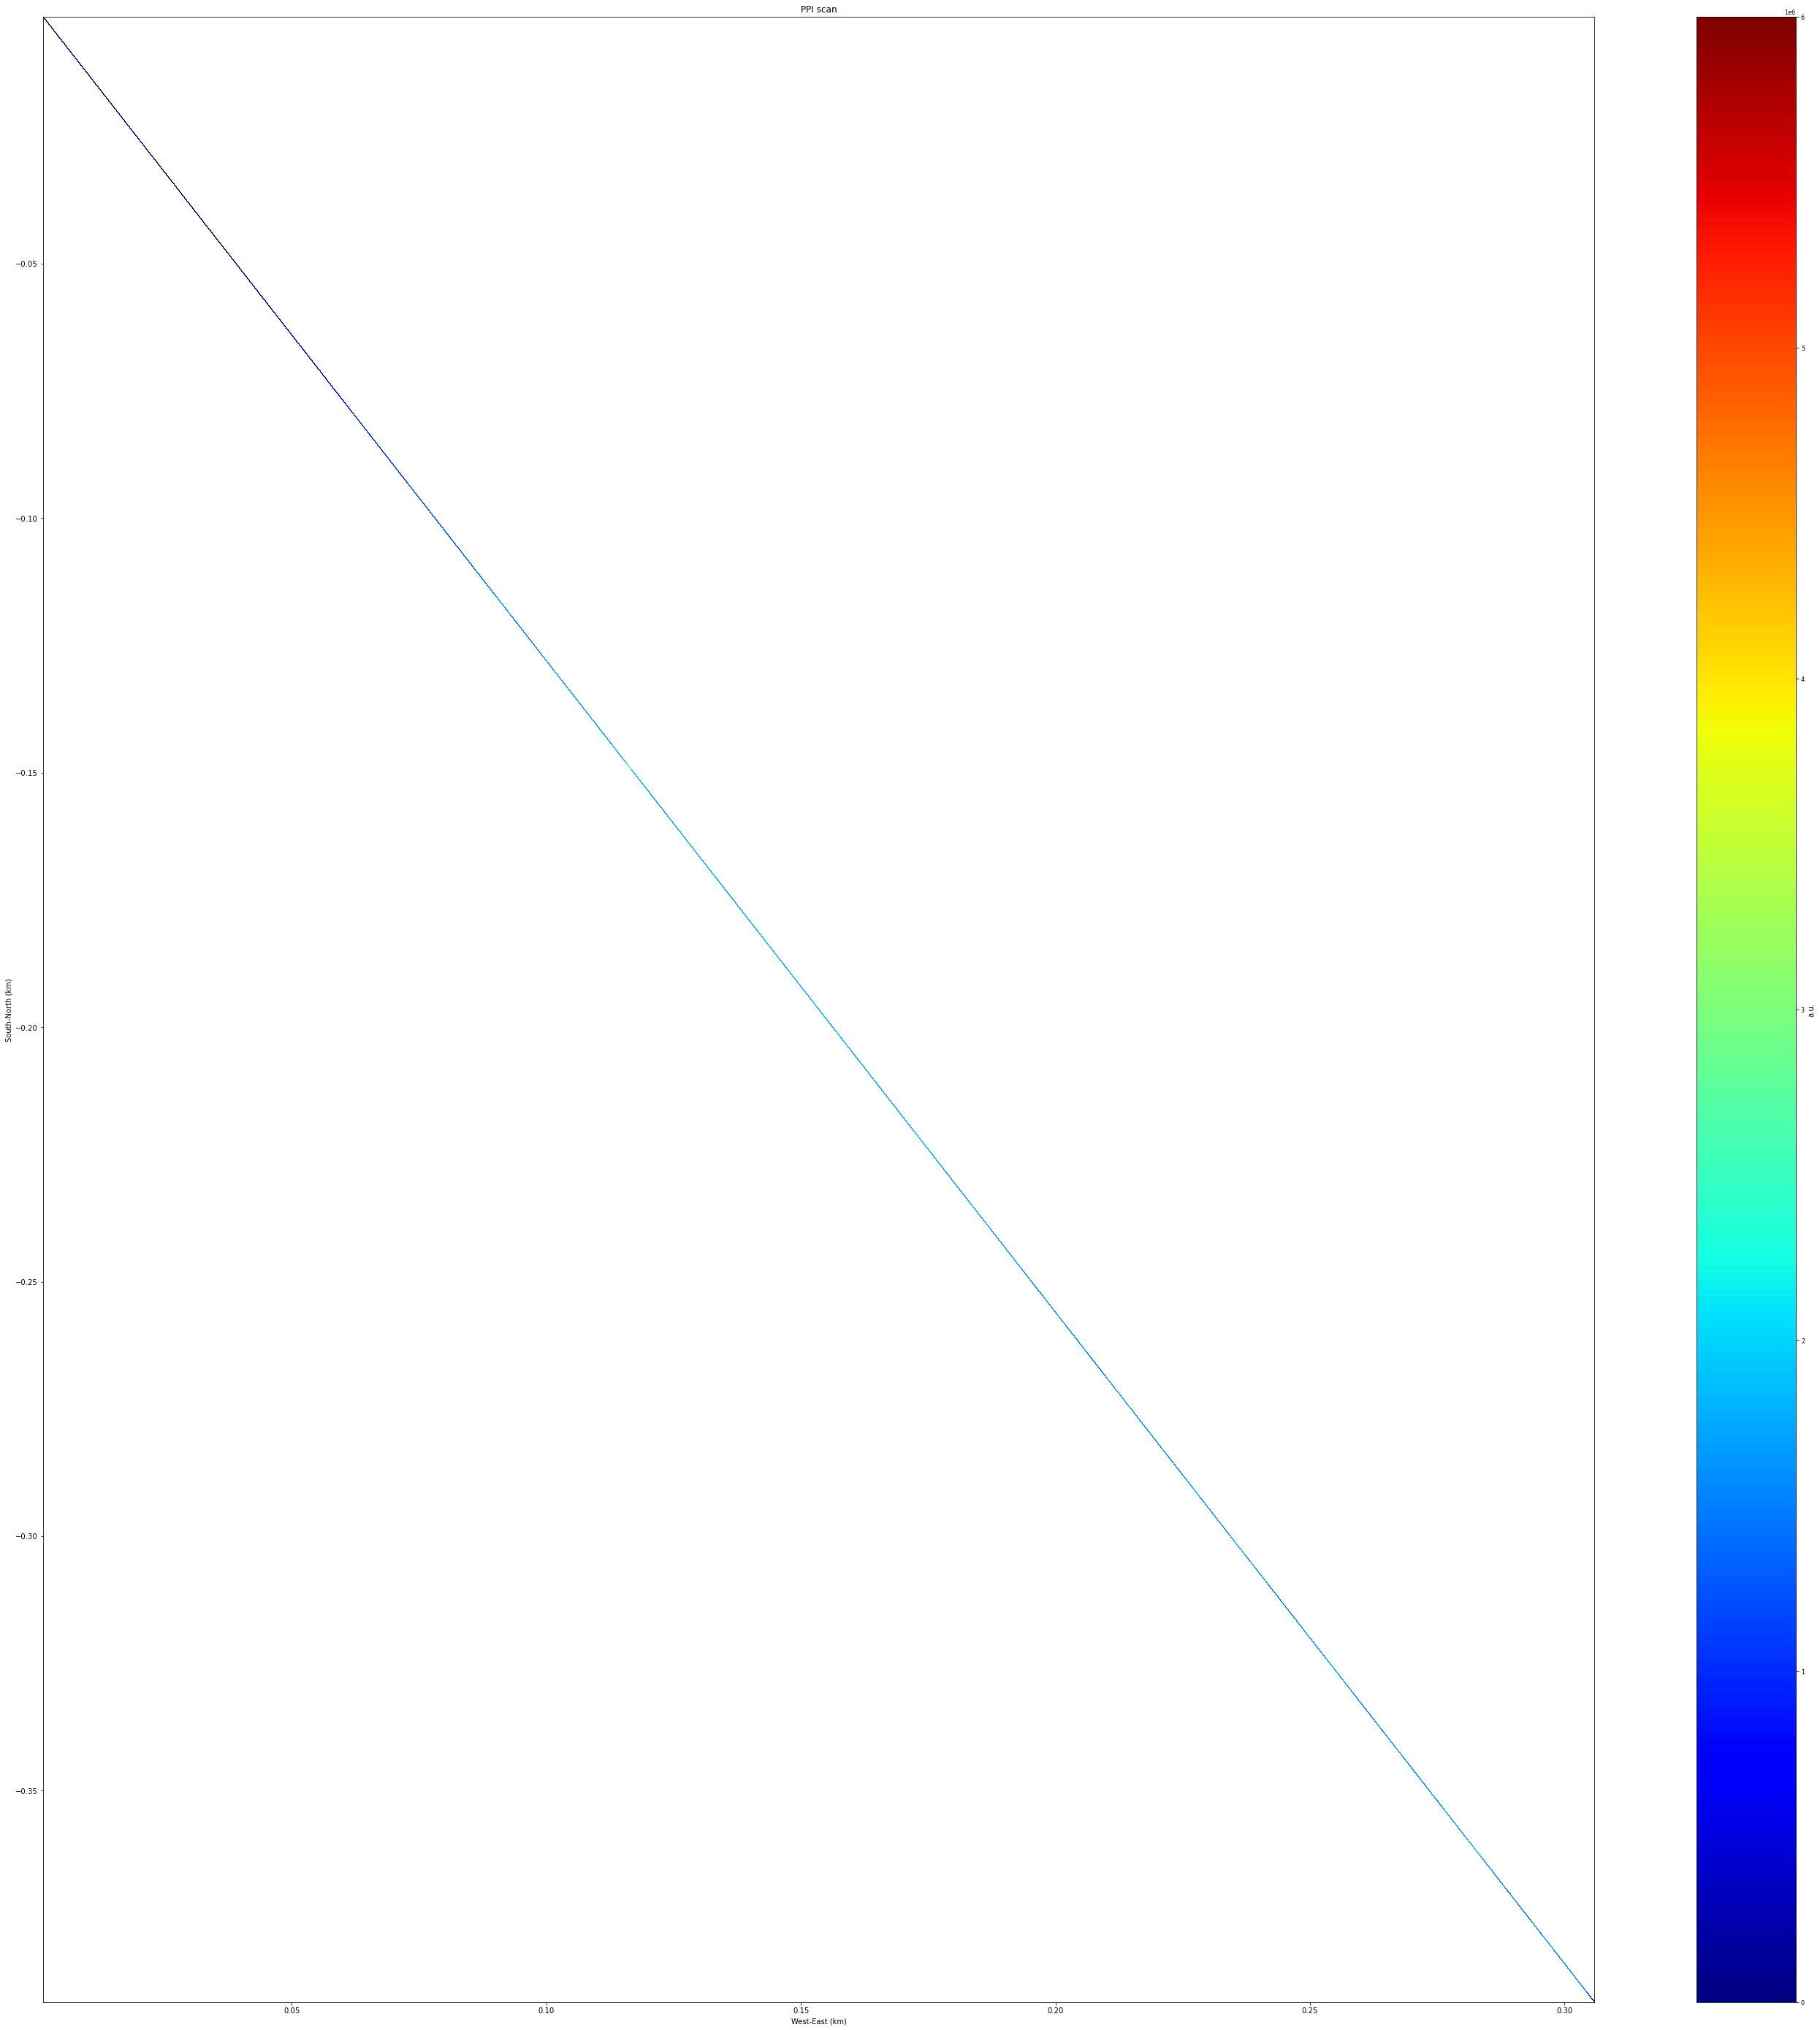

In [74]:
# Plot the PPI scans
for m in scans[1:]:  # Reject the first scan that contains only one file.
    c = m.channels[0]  # Get the measurement channel, containing data from all files
    c.plot_ppi(figsize=(50, 50),    # Size of the plots
            z_min=0,z_max=500, # Range limits
            vmin=0, vmax=6e6,   # Image limits
            mask_noise=False)   # Cut blank regions

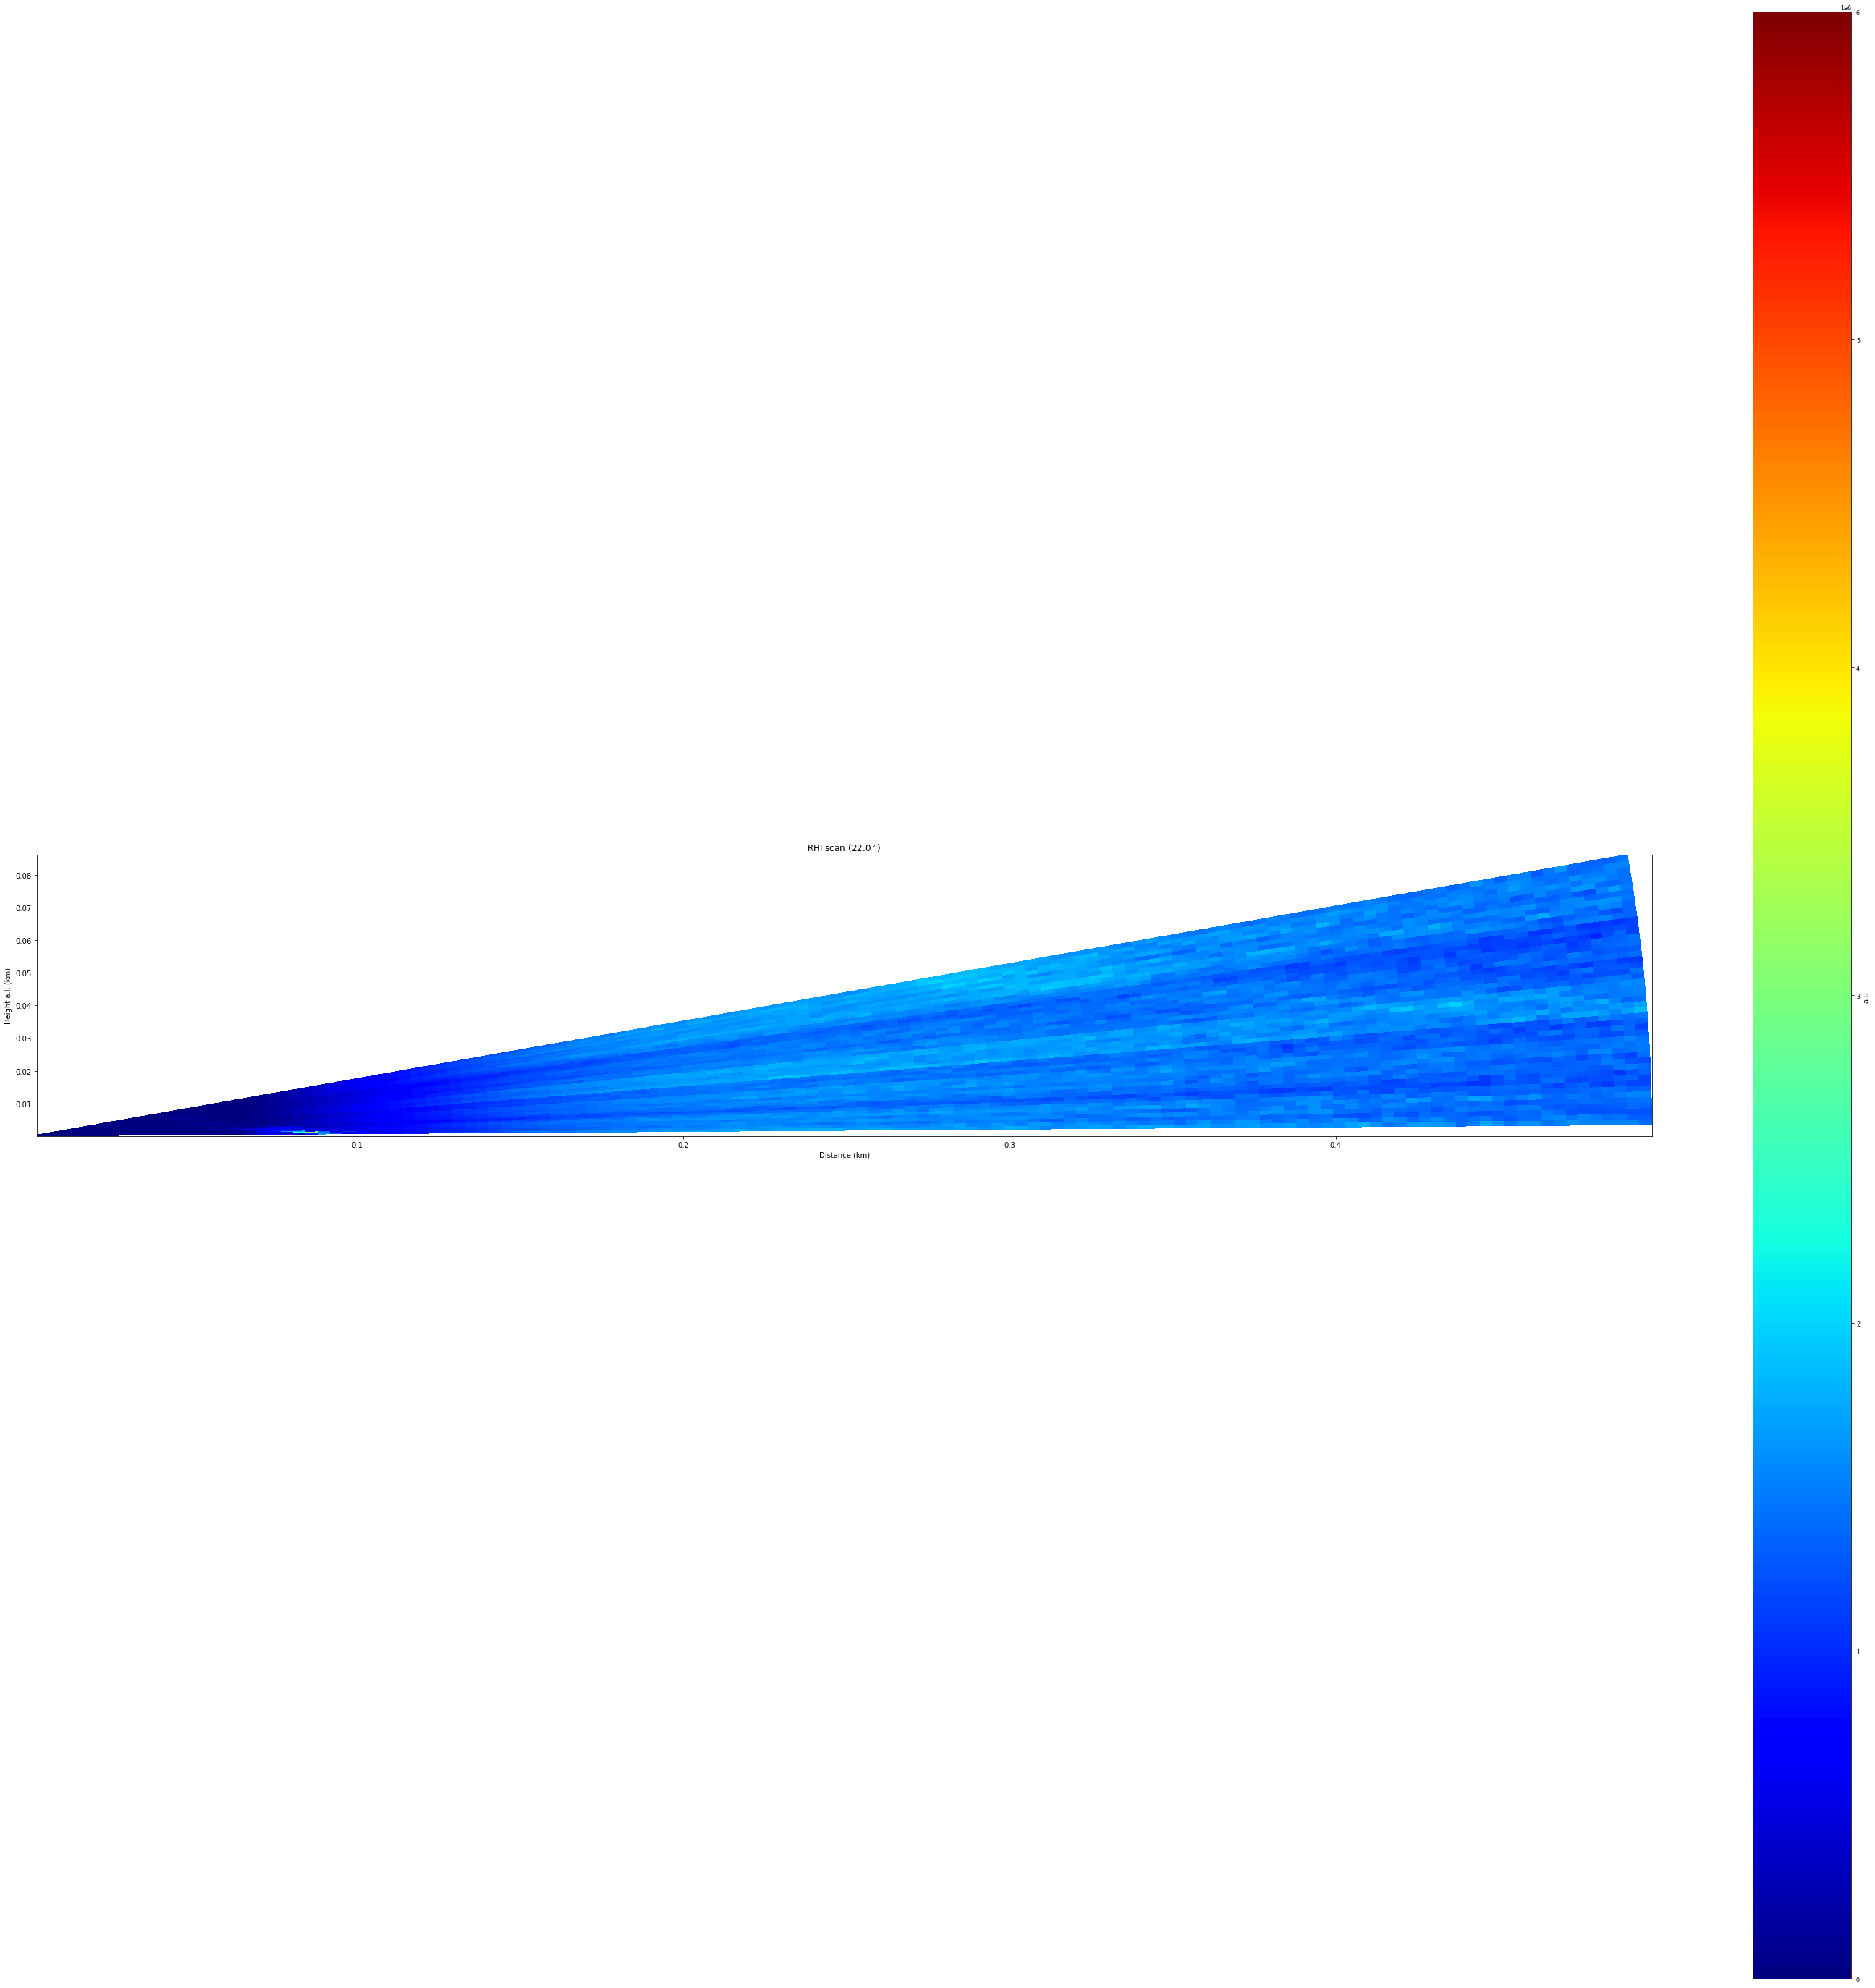

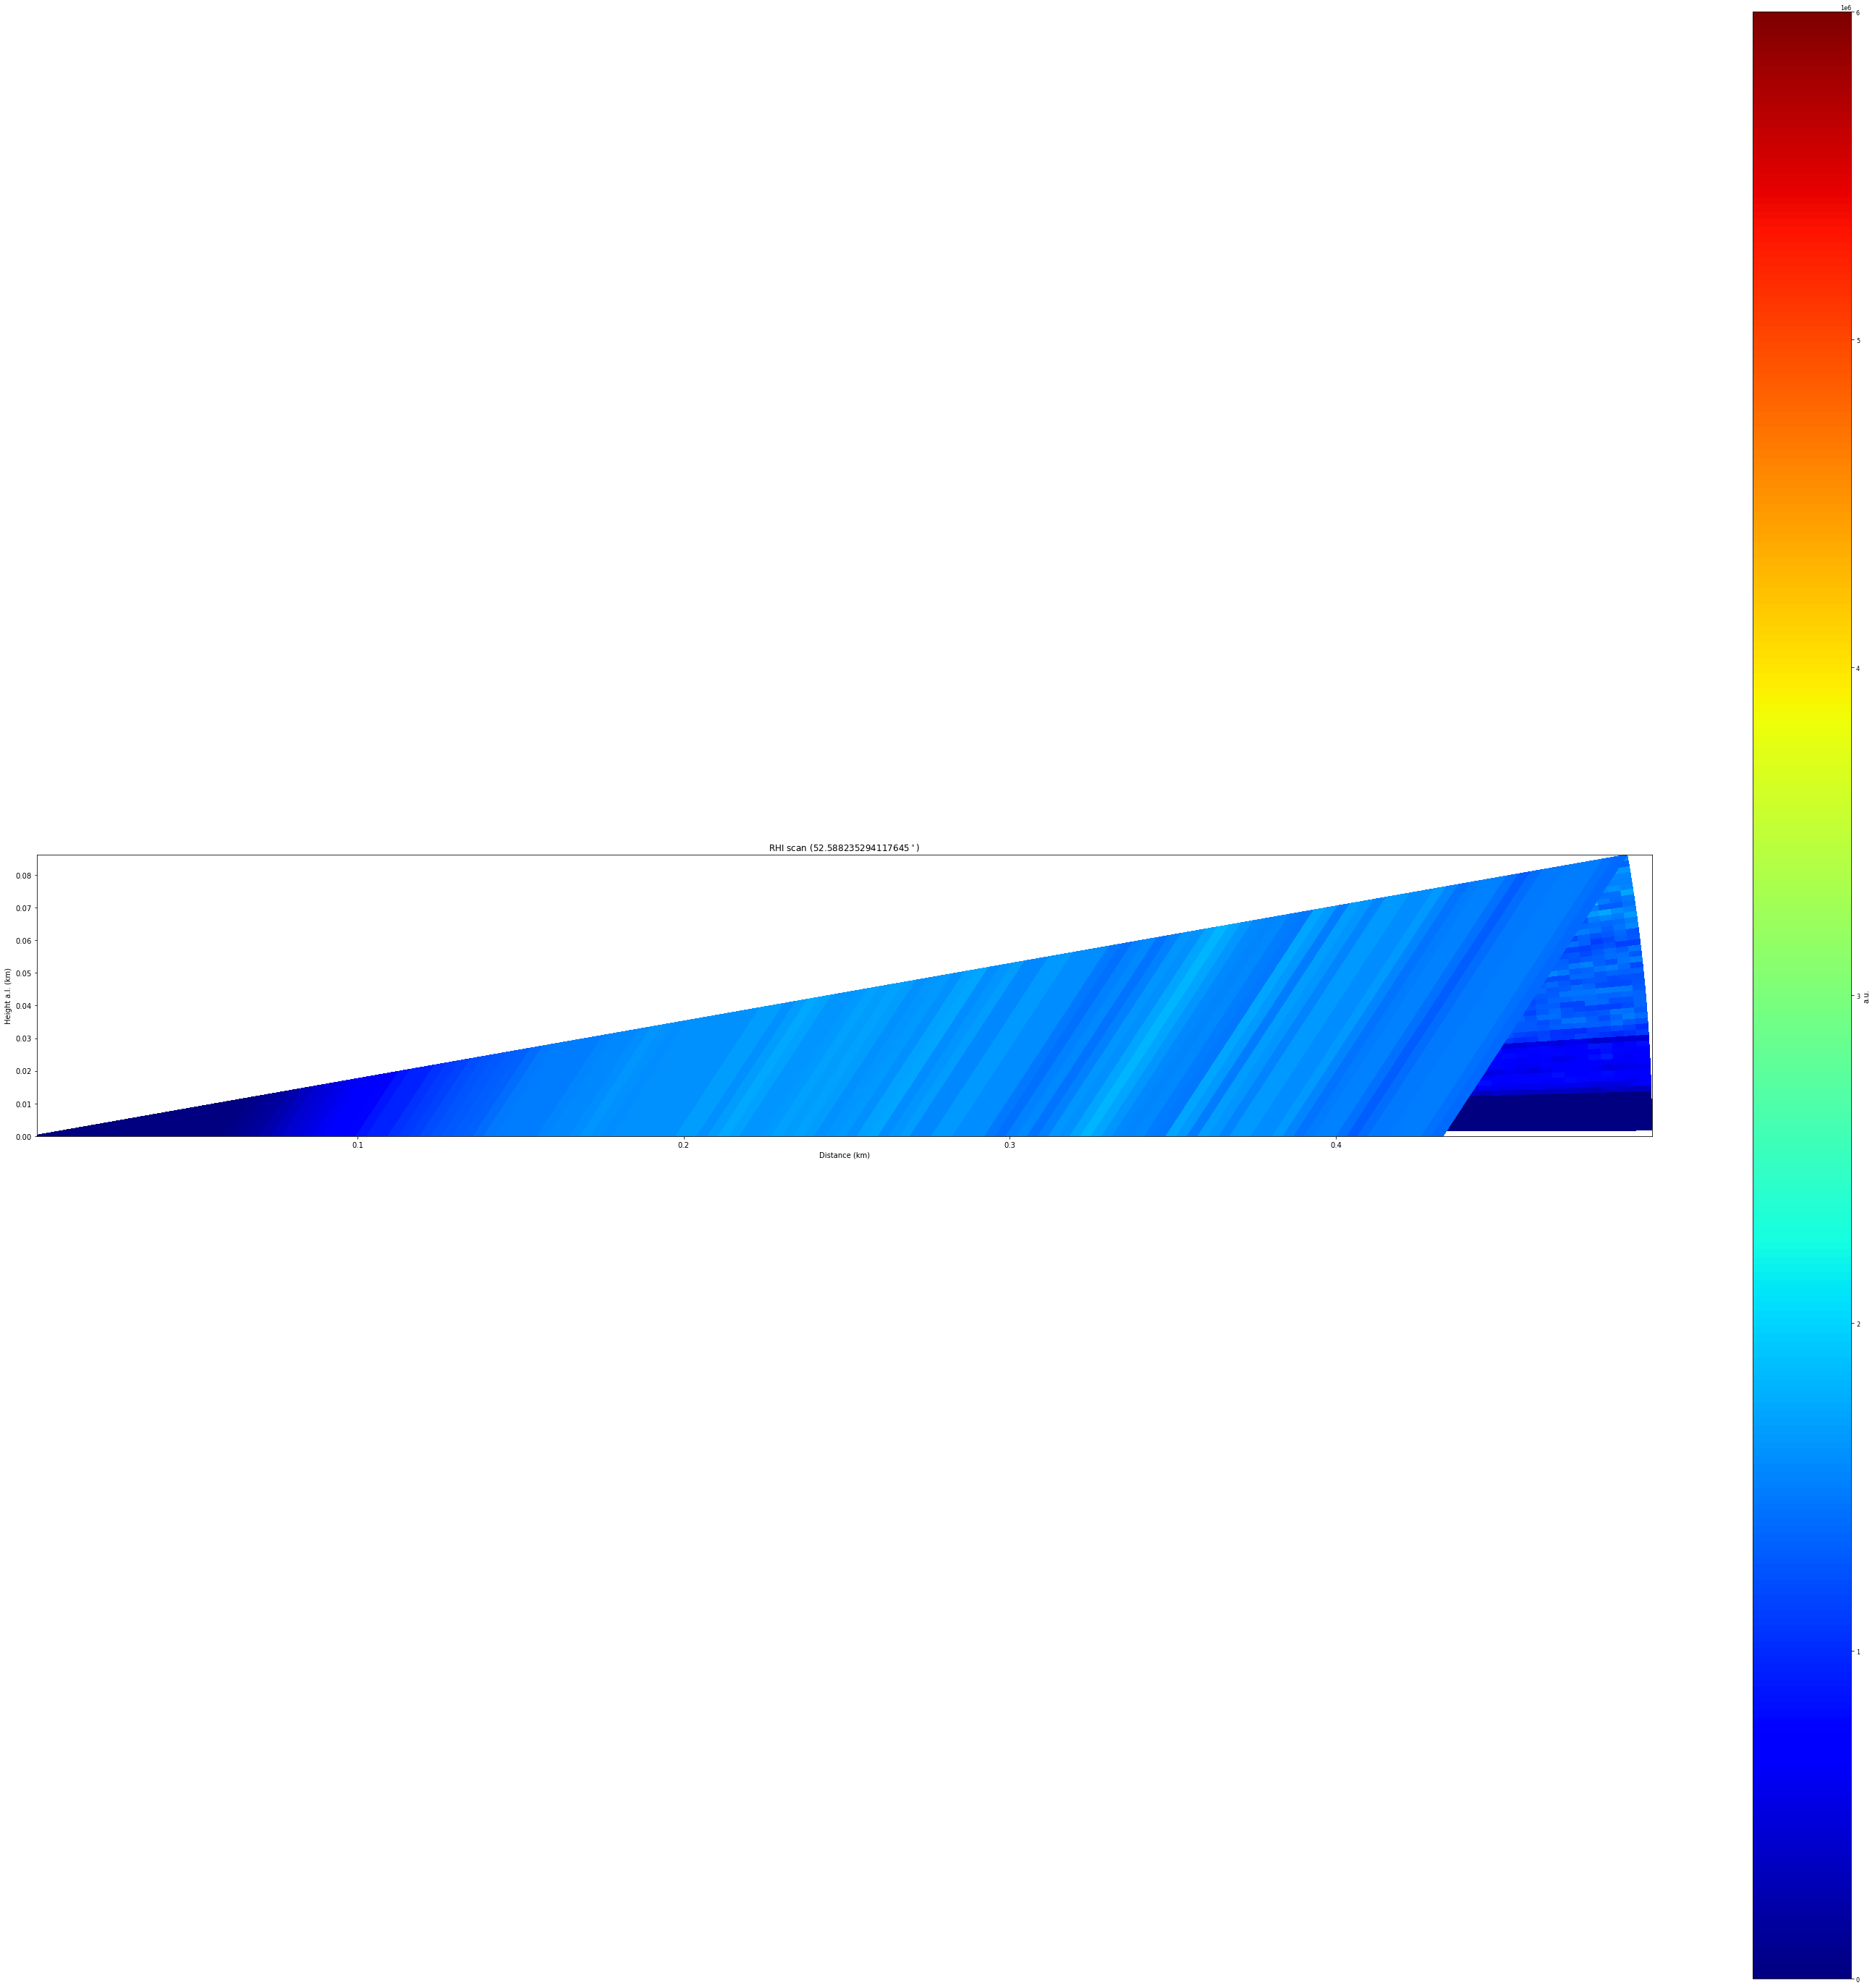

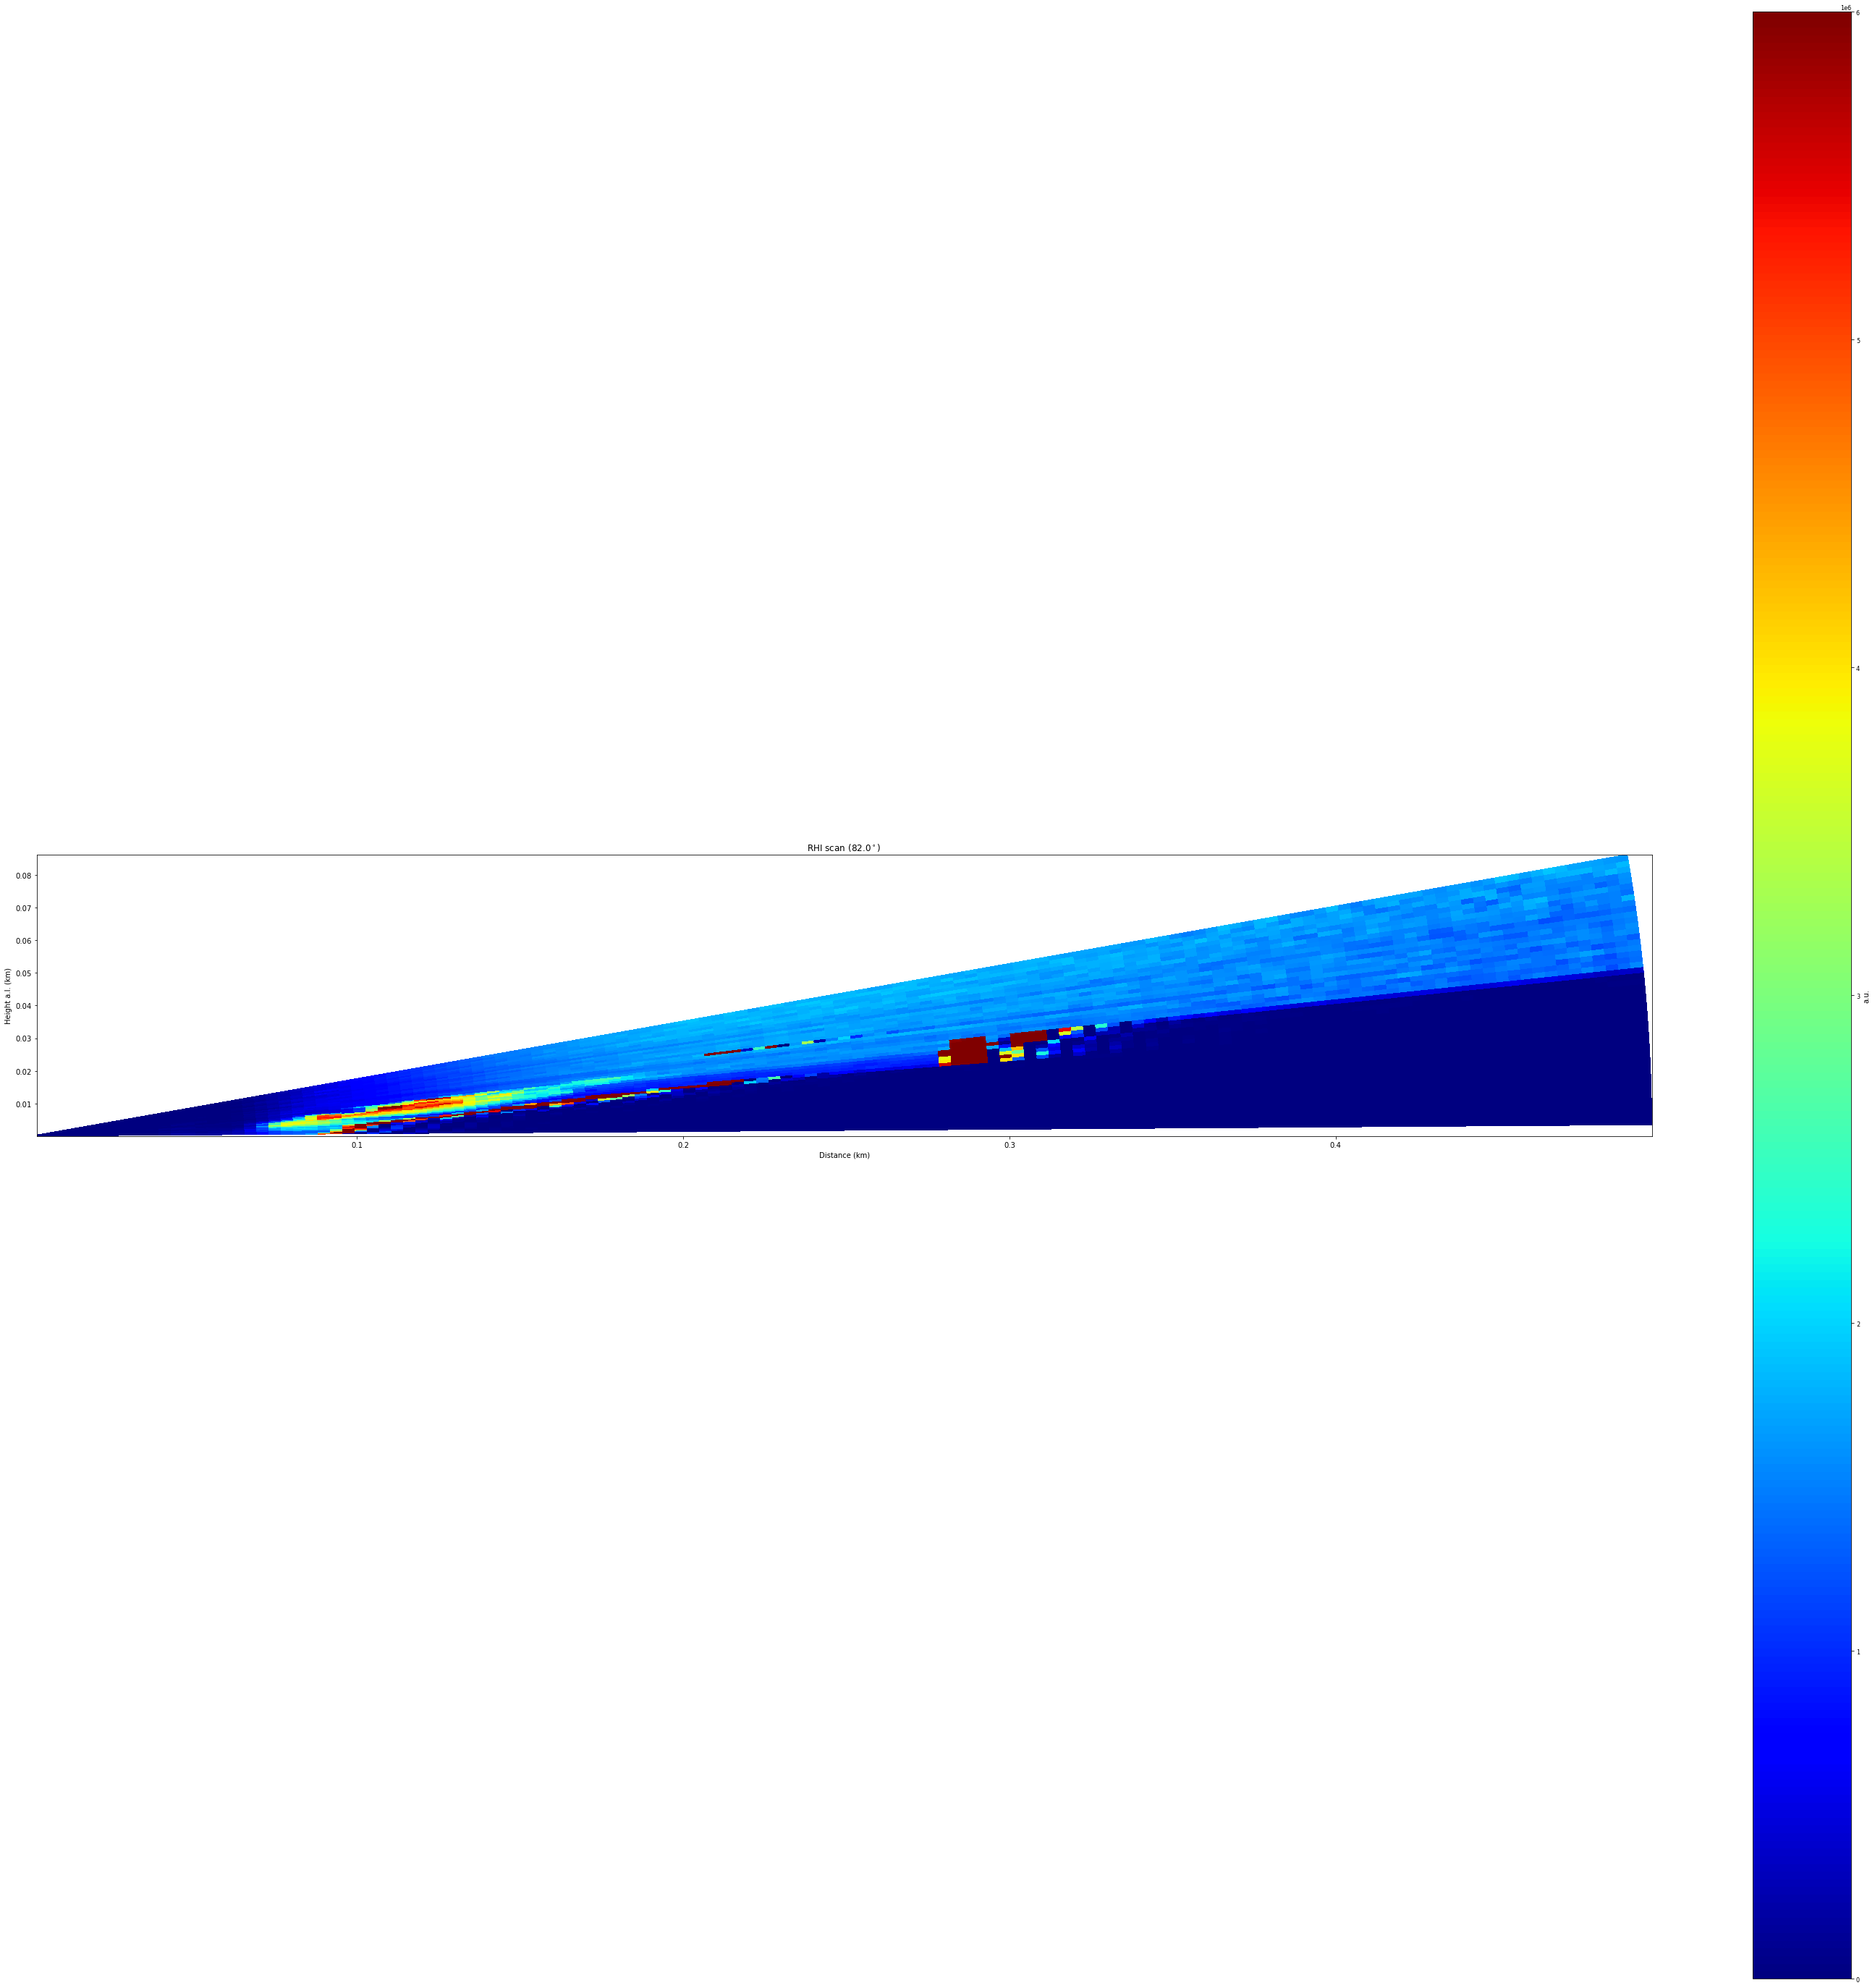

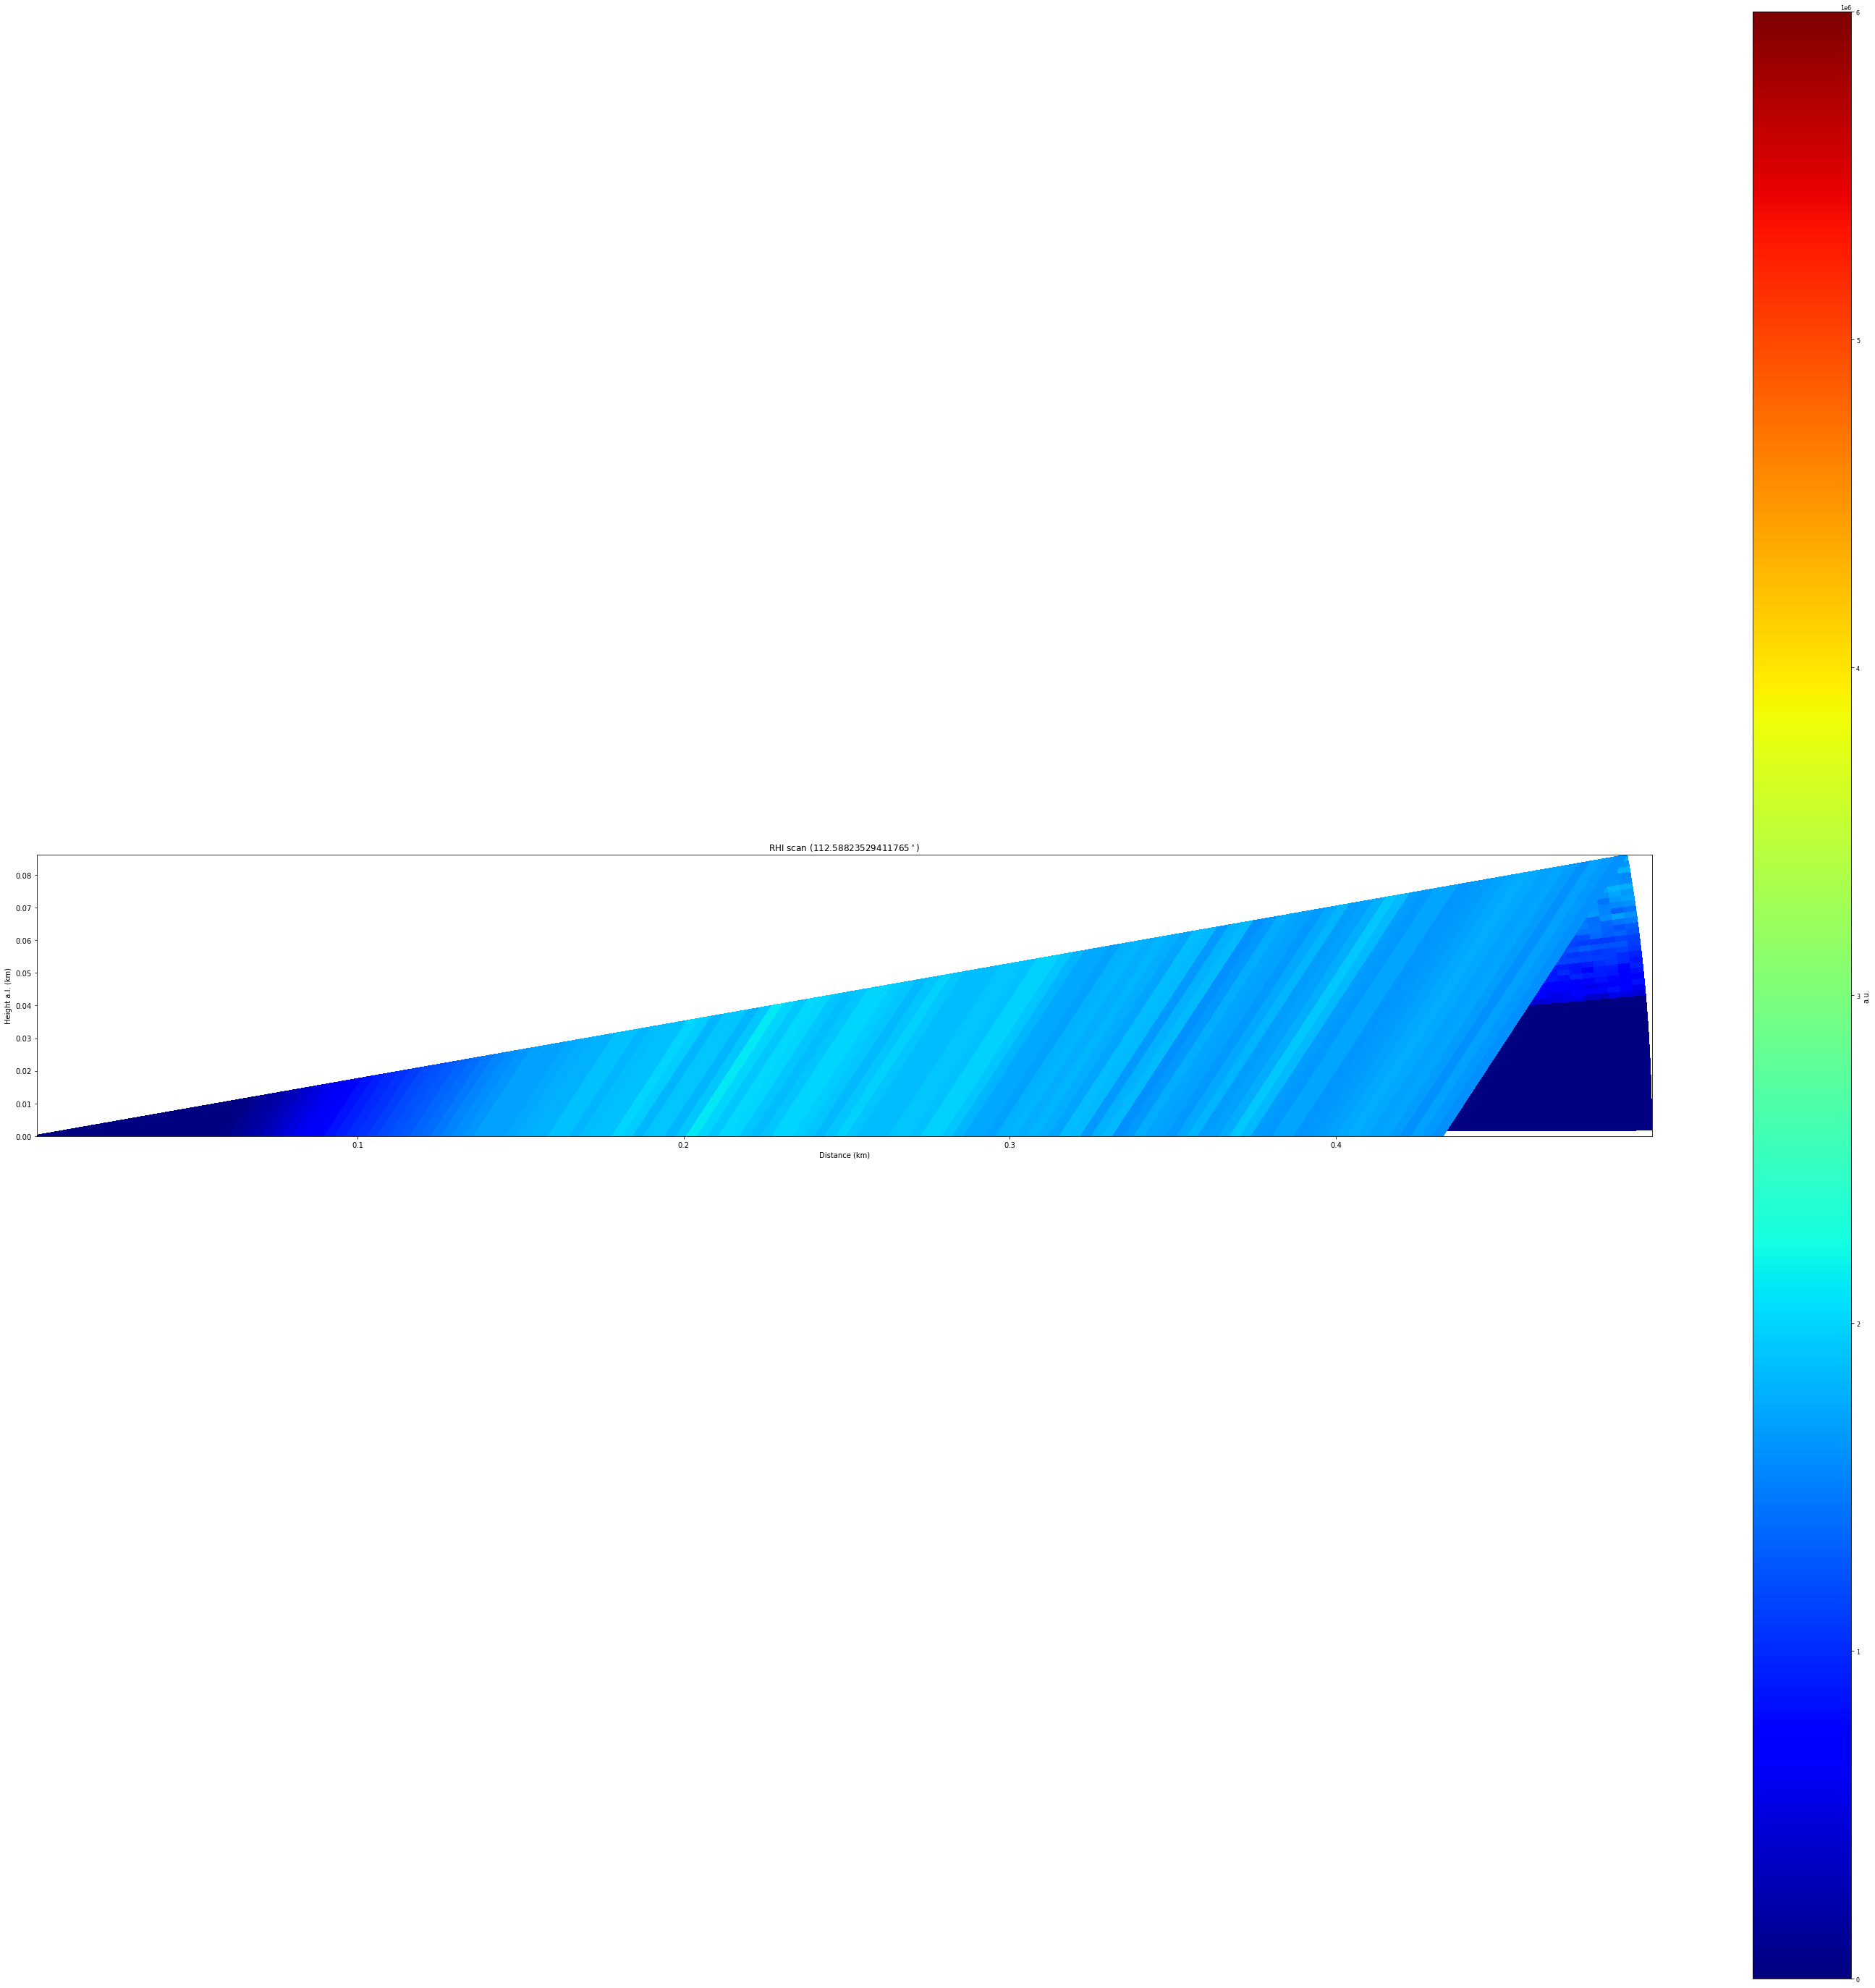

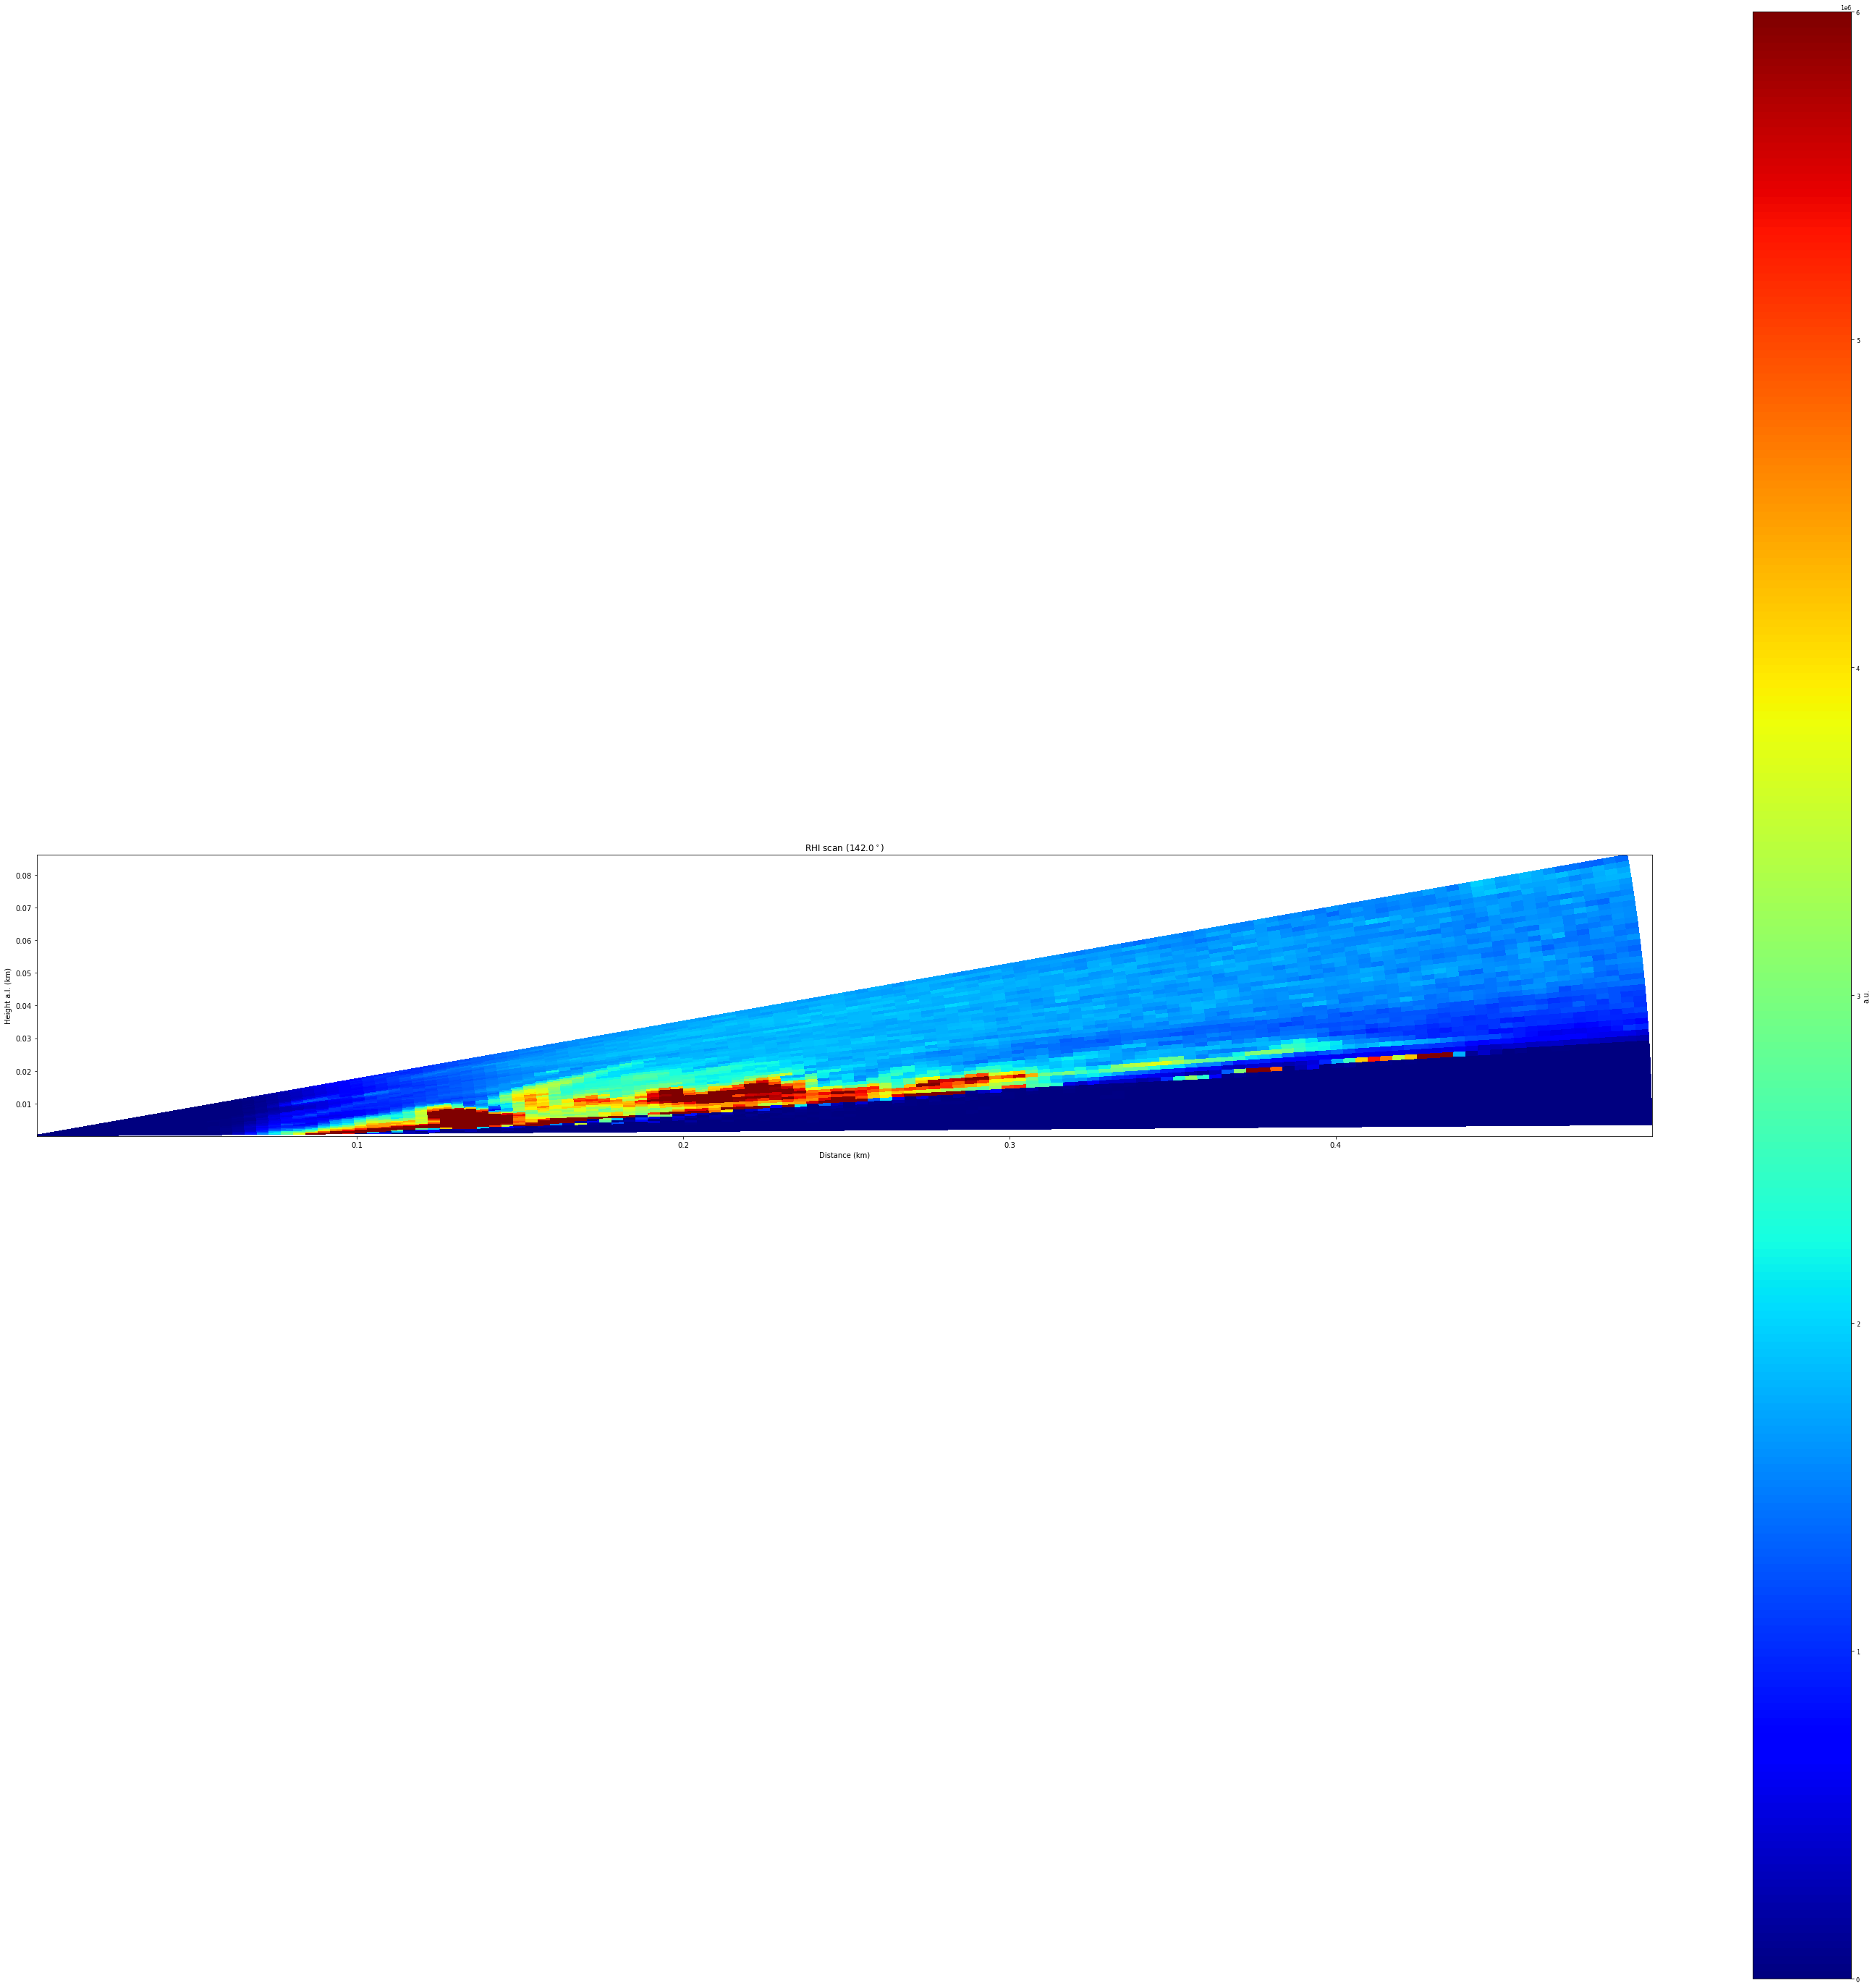

In [82]:
# Plot the RHI scans
for m in scans[1:]:  # Reject the first scan that contains only one file.
    c = m.channels[0]  # Get the measurement channel, containing data from all files
    c.plot_rhi(figsize=(50, 50),    # Size of the plots
            z_min=0,z_max=500, # Range limits
            vmin=0, vmax=6e6,   # Image limits
            mask_noise=False)   # Cut blank regions

Text(0, 0.5, 'Signal (mV)')

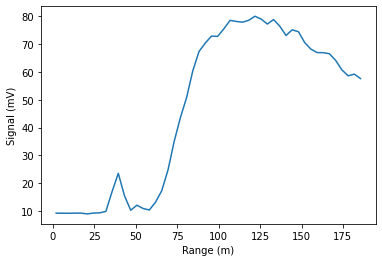

In [75]:
# Investigate the ringing of he detector
profile_idx = 40  # Number of profile to plot
max_z_idx = 50   # Maximum range bin to plot

m = scans[1]
c = m.channels[0]
plt.plot(c.z[:max_z_idx], c.matrix[40, :max_z_idx])
plt.xlabel('Range (m)')
plt.ylabel('Signal (mV)')

In [76]:
print(np.shape(c.matrix))
np.savetxt('fuckthisshit.txt', c.rc, delimiter=',')



(49, 16380)


In [77]:
aa, bb = c._polar_to_ground(c.z / 1000., c.azimuth_angles, c.zenith_angles)
print(np.shape(c.rc))


(49, 16380)


### Now print out the keys to the dictionary of the c.data

In [78]:

for key in c.data.keys():
    print(c.data[key])

[9.27021696 9.18568611 9.09176294 ... 9.15750916 9.22325538 9.30778623]
[9.22728066 9.15750916 9.25344497 ... 9.25344497 9.20983778 9.21855922]
[9.25344497 9.20983778 9.24472353 ... 9.31449503 9.27088784 9.26216641]
[9.17495203 9.20983778 9.20983778 ... 9.19239491 9.19239491 9.19239491]
[8.89586604 8.86098029 8.8173731  ... 8.96563754 8.93075179 8.89586604]
[8.82609454 8.83481598 8.90458748 ... 8.86970173 8.83481598 8.90458748]
[8.86970173 8.82609454 8.85225885 ... 8.89586604 8.89586604 8.79993023]
[9.20983778 9.18367347 9.22728066 ... 9.29705215 9.19239491 9.20983778]
[8.8871446  8.8871446  8.94819466 ... 8.91330891 8.91330891 8.96563754]
[9.20447074 9.24204001 9.20447074 ... 9.21386306 9.13872452 9.16690147]
[8.92958893 8.8970289  8.8970289  ... 8.91330891 8.8970289  8.90516891]
[8.85225885 8.87842316 8.89586604 ... 8.85225885 8.86098029 8.91330891]
[8.8871446  8.83481598 8.83481598 ... 8.85225885 8.87842316 8.9569161 ]
[8.84818885 8.88888889 8.95400895 ... 8.93772894 8.94586895 8.92

In [79]:

for key in c.data.keys():
    print(c.data[key])

[9.27021696 9.18568611 9.09176294 ... 9.15750916 9.22325538 9.30778623]
[9.22728066 9.15750916 9.25344497 ... 9.25344497 9.20983778 9.21855922]
[9.25344497 9.20983778 9.24472353 ... 9.31449503 9.27088784 9.26216641]
[9.17495203 9.20983778 9.20983778 ... 9.19239491 9.19239491 9.19239491]
[8.89586604 8.86098029 8.8173731  ... 8.96563754 8.93075179 8.89586604]
[8.82609454 8.83481598 8.90458748 ... 8.86970173 8.83481598 8.90458748]
[8.86970173 8.82609454 8.85225885 ... 8.89586604 8.89586604 8.79993023]
[9.20983778 9.18367347 9.22728066 ... 9.29705215 9.19239491 9.20983778]
[8.8871446  8.8871446  8.94819466 ... 8.91330891 8.91330891 8.96563754]
[9.20447074 9.24204001 9.20447074 ... 9.21386306 9.13872452 9.16690147]
[8.92958893 8.8970289  8.8970289  ... 8.91330891 8.8970289  8.90516891]
[8.85225885 8.87842316 8.89586604 ... 8.85225885 8.86098029 8.91330891]
[8.8871446  8.83481598 8.83481598 ... 8.85225885 8.87842316 8.9569161 ]
[8.84818885 8.88888889 8.95400895 ... 8.93772894 8.94586895 8.92

In [80]:
aa, bb = c._polar_to_ground(c.z / 1000., c.azimuth_angles, c.zenith_angles)
print(np.shape(c.rc))


(49, 16380)


### Now print out the keys to the dictionary of the c.data

In [81]:

for key in c.data.keys():
    print(c.data[key])

[9.27021696 9.18568611 9.09176294 ... 9.15750916 9.22325538 9.30778623]
[9.22728066 9.15750916 9.25344497 ... 9.25344497 9.20983778 9.21855922]
[9.25344497 9.20983778 9.24472353 ... 9.31449503 9.27088784 9.26216641]
[9.17495203 9.20983778 9.20983778 ... 9.19239491 9.19239491 9.19239491]
[8.89586604 8.86098029 8.8173731  ... 8.96563754 8.93075179 8.89586604]
[8.82609454 8.83481598 8.90458748 ... 8.86970173 8.83481598 8.90458748]
[8.86970173 8.82609454 8.85225885 ... 8.89586604 8.89586604 8.79993023]
[9.20983778 9.18367347 9.22728066 ... 9.29705215 9.19239491 9.20983778]
[8.8871446  8.8871446  8.94819466 ... 8.91330891 8.91330891 8.96563754]
[9.20447074 9.24204001 9.20447074 ... 9.21386306 9.13872452 9.16690147]
[8.92958893 8.8970289  8.8970289  ... 8.91330891 8.8970289  8.90516891]
[8.85225885 8.87842316 8.89586604 ... 8.85225885 8.86098029 8.91330891]
[8.8871446  8.83481598 8.83481598 ... 8.85225885 8.87842316 8.9569161 ]
[8.84818885 8.88888889 8.95400895 ... 8.93772894 8.94586895 8.92